# Final Project - MA336 2311489

## Introduction - Abstract:
What makes an NBA team tick? When talking basketball, we are constantly reminded of the almost cliche sayings: there is no 'I' in team and offense wins games, but defense wins championships. This is all well and fine on a personal level, and these sayings serve as flagpoles for rallying teams together, or getting the best out of an individual player, but what does the data say? Could it be that outstanding players have the ability to carry their teams to greatness - even championships regardless of their defensive contribution to their team? Or do these sayings hold true even on an analytical understanding of the game. The following code explores the truth behind sayings as well as understanding which team metrics are the most important in making a team win games. Furthermore, using the given data, alternatives are explored using Random Forests to predict the outcome of games in April for the NBA, one of the most important months in the calendar, as this is when the playoffs start and teams have clinching divisions, conferences, or even making the actual playoffs on the line. By measuring the performance of these 2 models, we could acquire a solid look into what this year's playoffs might look like. 

## Datasets used:
Players df as of March 16th 2024: https://shotquality.com/team-standings
Standings df as of March 26th 2024: https://www.kaggle.com/datasets/vivovinco/2023-2024-nba-player-stats


In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from io import StringIO
import csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import tensorflow 


In [2]:
#Import players dataset from Kaggle user vivovinco - updated as of March 16th
players = pd.read_csv("/Users/rodrigovelesco/Desktop/Final Project AI/2023-2024 NBA Player Stats - Regular.csv", sep =";", encoding='latin-1')

players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      698 non-null    int64  
 1   Player  698 non-null    object 
 2   Pos     698 non-null    object 
 3   Age     698 non-null    int64  
 4   Tm      698 non-null    object 
 5   G       698 non-null    int64  
 6   GS      698 non-null    int64  
 7   MP      698 non-null    float64
 8   FG      698 non-null    float64
 9   FGA     698 non-null    float64
 10  FG%     698 non-null    float64
 11  3P      698 non-null    float64
 12  3PA     698 non-null    float64
 13  3P%     698 non-null    float64
 14  2P      698 non-null    float64
 15  2PA     698 non-null    float64
 16  2P%     698 non-null    float64
 17  eFG%    698 non-null    float64
 18  FT      698 non-null    float64
 19  FTA     698 non-null    float64
 20  FT%     698 non-null    float64
 21  ORB     698 non-null    float64
 22  DR

In [3]:
#import standings dataset from https://shotquality.com/team-standings
standings = pd.read_csv("/Users/rodrigovelesco/Desktop/Final Project AI/shot_quality.csv")

#offset 1st column to start at 1 instead of 0 so 1st rank = rank 1 
standings.index += 1
standings

,Team_Name,Conference,Adjusted_Shot_Quality,Offensive_Shot_Quality,Offensive_Shot_Quality_Rank_Visual,Defensive_Shot_Quality,Defensive_Shot_Quality_Rank_Visual,Rim_and_3_rate,Actual_Record,Actual_Win_Percentage,SQ_Record,SQ_Win_Percentage,Record_Luck
1,Boston Celtics,East,0.06,1.20,0.931034,1.14,0.965517,0.819695,57-15,0.791667,5220,0.722705,-6.90
2,Denver Nuggets,West,0.05,1.20,0.931034,1.15,0.793103,0.749922,51-21,0.708333,4923,0.685421,-2.29
3,Phoenix Suns,West,0.05,1.21,1.000000,1.16,0.448276,0.706819,41-31,0.569444,4824,0.671236,10.18
4,Milwaukee Bucks,East,0.04,1.19,0.793103,1.15,0.793103,0.783058,46-25,0.647887,4427,0.621061,-2.68
5,Sacramento Kings,West,0.03,1.18,0.620690,1.15,0.793103,0.793795,41-29,0.585714,4228,0.600702,1.50
6,Los Angeles Lakers,West,0.03,1.18,0.620690,1.15,0.793103,0.756036,40-32,0.555556,4329,0.600149,4.46
7,Los Angeles Clippers,West,0.03,1.19,0.793103,1.16,0.448276,0.737686,44-26,0.628571,4327,0.611316,-1.73
8,Indiana Pacers,East,0.02,1.19,0.793103,1.18,0.068966,0.810256,40-33,0.547945,4033,0.544317,-0.36
9,Golden State Warriors,West,0.02,1.19,0.793103,1.16,0.448276,0.795549,36-34,0.514286,4030,0.575821,6.15
10,Dallas Mavericks,West,0.02,1.18,0.620690,1.17,0.275862,0.784591,41-29,0.585714,3931,0.555943,-2.98


## Part 1.1: Understanding the game through EDA.

The first part of this analysis consists in exploring the given data to have a clear and concise understanding of it. The data sources are player stats obtained from Kaggle user vivinco updated as of March 16th 2024. The standings DF is a direct export of Shot Quality's website. Shot Quality provides different prediction models for betting and bookeeping on NBA and NCAA markets. The understanding of the data and consequently today's NBA panorama comes, in this context, from understanding high performing players' individual performance as well as differentiating between 'high performing' and 'low performing' players using K-means clustering.

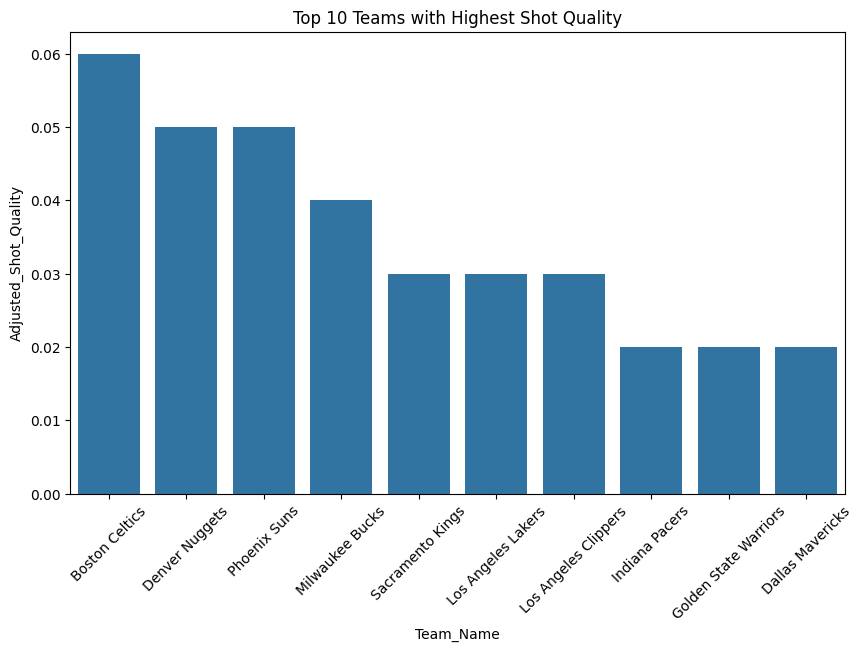

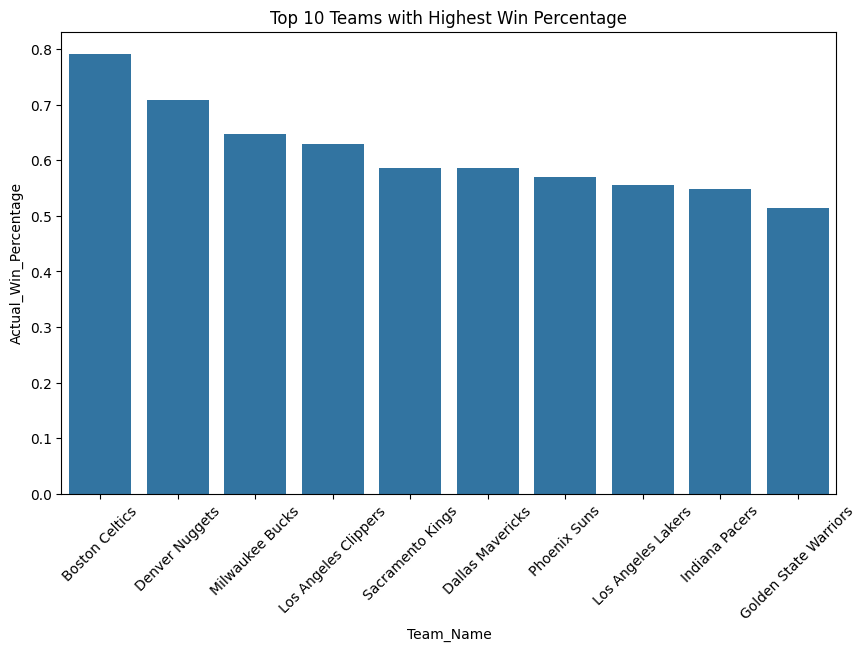

In [4]:
#plot top 10 teams with highest shot quality
plt.figure(figsize=(10,6))
sns.barplot(x='Team_Name', y='Adjusted_Shot_Quality', data=standings.head(10))
plt.title('Top 10 Teams with Highest Shot Quality')
plt.xticks(rotation=45)
plt.show()


#plot top 10 teams with highest win percentage
plt.figure(figsize=(10,6))
sns.barplot(x='Team_Name', y='Actual_Win_Percentage', data=standings.head(10), order=standings.head(10).sort_values('Actual_Win_Percentage', ascending=False).Team_Name)
plt.title('Top 10 Teams with Highest Win Percentage')
plt.xticks(rotation=45)
plt.show()

In [5]:
#Correlation between shot quality and win percentage
correlation = standings['Adjusted_Shot_Quality'].corr(standings['Actual_Win_Percentage'])
print('Correlation between Shot Quality and Win Percentage:', correlation)

Correlation between Shot Quality and Win Percentage: 0.869006883123476


This is a surface level understanding of what makes a team win. How good are the shots your team is taking? This is a metric developed by Shot Quality in which "... each shot is graded on a 0-100 percent scale, which represents the likelihood the shot results in a made basket, and then is multiplied by the amount of points attempted to get the ShotQuality value." (shotquality.com) The high positive correlation between shot quality and win percentage could be considered obvious, but it is a good correlation to verify in case there are outlying teams in the top 10. (Note the Phoenix Suns and Dallas Mavericks win percentages vs. Shot Quality)

In [6]:
#Creating PRA and Defensive Action metrics in df

players['PRA'] = players['ORB'] + players['DRB'] + players['AST'] + players['PTS']
players['def_actions'] = players['DRB'] + players['BLK'] + players['STL']


A points, rebounds and assists ('PRA') metric was created as well as a defensive actions ('def_actions') metric, both popular in sportsbooks in order to determine player performance, this serves the purpose of finding high performing vs. low performing players.

In [7]:
#save unique team 'keys' as dictionary as key to join standings and player dfs. 
team_dict = {'ATL': 'Atlanta Hawks', 
             'BOS': 'Boston Celtics', 
             'BRK': 'Brooklyn Nets', 
             'CHI': 'Chicago Bulls', 
             'CHO': 'Charlotte Hornets', 
             'CLE': 'Cleveland Cavaliers', 
             'DAL': 'Dallas Mavericks', 
             'DEN': 'Denver Nuggets', 
             'DET': 'Detroit Pistons', 
             'GSW': 'Golden State Warriors', 
             'HOU': 'Houston Rockets', 
             'IND': 'Indiana Pacers', 
             'LAC': 'Los Angeles Clippers', 
             'LAL': 'Los Angeles Lakers', 
             'MEM': 'Memphis Grizzlies', 
             'MIA': 'Miami Heat', 
             'MIL': 'Milwaukee Bucks', 
             'MIN': 'Minnesota Timberwolves', 
             'NOP': 'New Orleans Pelicans', 
             'NYK': 'New York Knicks', 
             'OKC': 'Oklahoma City Thunder', 
             'ORL': 'Orlando Magic', 
             'PHI': 'Philadelphia 76ers', 
             'PHO': 'Phoenix Suns', 
             'POR': 'Portland Trail Blazers', 
             'SAC': 'Sacramento Kings', 
             'SAS': 'San Antonio Spurs', 
             'TOR': 'Toronto Raptors', 
             'UTA': 'Utah Jazz', 
             'WAS': 'Washington Wizards'}
#reversing team_dict dictionary
team_dict1 = {v: k for k, v in team_dict.items()}

#Team_dict column in standings df to use as key for merging both df's
standings['Team_dict'] = standings['Team_Name'].map(team_dict1)

players = players.merge(standings, left_on='Tm', right_on='Team_dict', how='right')

# remove rows with Tm = TOT
players = players[players['Tm'] != 'TOT']


### Part 1.2: Individual Player Analysis.
Having created the aforementioned metrics, a next logical step would be to delve into individual player performance. The scatterplot below represents the top 30 players with highest PRA's in where, the actual win % is charted against the average PRA's made per game. This paired with the defensive actions carried out per game, represented by dot size, as well as field goal percentage, represented by dot color. 

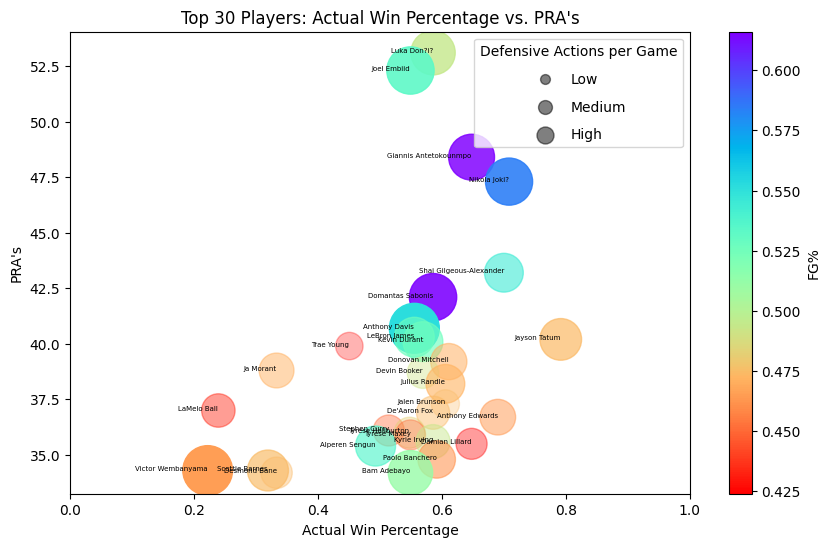

In [8]:
top_30_scorers = players.nlargest(30, 'PRA')

# Define the size and transparency based on the 'def_actions' column
sizes = top_30_scorers['def_actions'] * 100 # Adjust multiplier as needed to control the size
alpha_values = top_30_scorers['def_actions'] / top_30_scorers['def_actions'].max()  # Normalize alpha values

plt.figure(figsize=(10, 6))
plt.scatter(top_30_scorers['Actual_Win_Percentage'], top_30_scorers['PRA'], s=sizes, alpha=alpha_values, c=top_30_scorers['FG%'], cmap='rainbow_r')

# Adding labels and title
plt.xlabel('Actual Win Percentage')
plt.ylabel('PRA\'s')
plt.title('Top 30 Players: Actual Win Percentage vs. PRA\'s')

# Add player names on dots
for i, player in top_30_scorers.iterrows():
    plt.text(player['Actual_Win_Percentage'], player['PRA'], player['Player'], ha='right', va='baseline', fontsize=5)

# Adjust x-axis limits
plt.xlim(0, 1)

plt.colorbar(label='FG%')  # Add colorbar legend for better understanding of dot index
# Create a legend for dot sizes (defensive actions per game)
sizes_legend = [50, 100, 150]  # Example sizes
sizes_legend_labels = ['Low', 'Medium', 'High']  # Example labels

for size, label in zip(sizes_legend, sizes_legend_labels):
    plt.scatter([], [], s=size, label=label, color='black', alpha=0.5)  # Create dummy scatter plot for legend

plt.legend(scatterpoints=1, labelspacing=1, title='Defensive Actions per Game', loc='upper right')
plt.show()


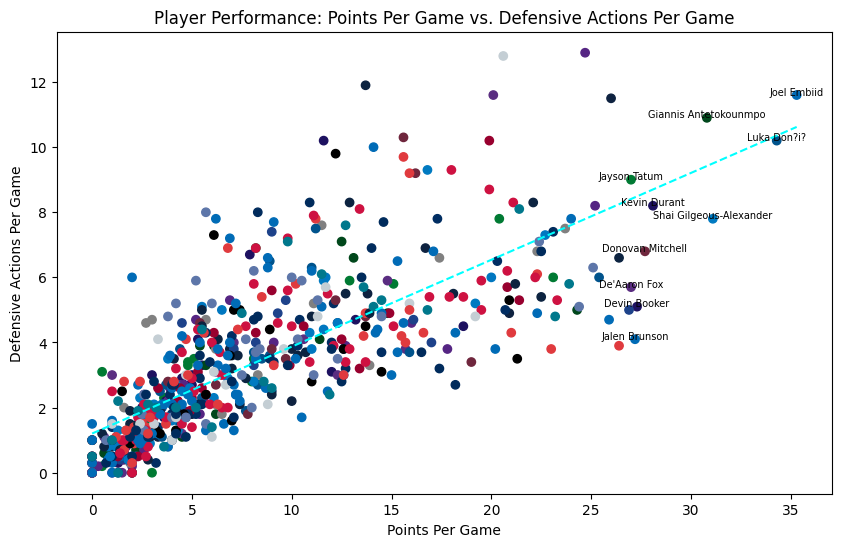

In [9]:
# Convert 'Tm' column to category type
players['Team_Name'] = pd.Categorical(players['Team_Name'])

#creating a dictionary for mapping team colors.
team_colors_dict = {
    'Atlanta Hawks': '#e03a3e',
    'Boston Celtics': '#007a33',
    'Brooklyn Nets': '#000000',
    'Charlotte Hornets': '#00788c',
    'Chicago Bulls': '#ce1141',
    'Cleveland Cavaliers': '#6f263d',
    'Dallas Mavericks': '#00538c',
    'Denver Nuggets': '#0e2240',
    'Detroit Pistons': '#006bb6',
    'Golden State Warriors': '#1d428a',
    'Houston Rockets': '#ce1141',
    'Indiana Pacers': '#002d62',
    'LA Clippers': '#c8102e',
    'Los Angeles Lakers': '#552583',
    'Memphis Grizzlies': '#5d76a9',
    'Miami Heat': '#98002e',
    'Milwaukee Bucks': '#00471b',
    'Minnesota Timberwolves': '#0c2340',
    'New Orleans Pelicans': '#0c2340',
    'New York Knicks': '#006bb6',
    'Oklahoma City Thunder': '#007ac1',
    'Orlando Magic': '#0077c0',
    'Philadelphia 76ers': '#006bb6',
    'Phoenix Suns': '#1d1160',
    'Portland Trail Blazers': '#e03a3e',
    'Sacramento Kings': '#5a2d81',
    'San Antonio Spurs': '#c4ced4',
    'Toronto Raptors': '#ce1141',
    'Utah Jazz': '#002b5c',
    'Washington Wizards': '#002b5c'
}
# Assigning colors to each team based on the dictionary
team_colors = players['Team_Name'].map(team_colors_dict)

default_color = 'gray'
team_colors = team_colors.fillna(default_color)

plt.figure(figsize=(10, 6))
# Scatter plot with colored points based on player's team
scatter = plt.scatter(players['PTS'], players['def_actions'], c=team_colors)

# Labelling top 10 players in the top right corner
top_10_players = players.nlargest(10, 'PTS')
for i, player in top_10_players.iterrows():
    plt.text(player['PTS'], player['def_actions'], player['Player'], ha='center', va='baseline', fontsize=7)

# plotting ab line for linear regression
plt.plot(np.unique(players['PTS']), np.poly1d(np.polyfit(players['PTS'], players['def_actions'], 1))(np.unique(players['PTS'])), color='cyan', linestyle='--', label='Linear Regression')   

plt.xlabel('Points Per Game')
plt.ylabel('Defensive Actions Per Game')
plt.title('Player Performance: Points Per Game vs. Defensive Actions Per Game')


plt.show()


The above scatterplot shows something quite interesting. As per the plot's labels, a player's points per game and defensive actions per game tend to have a strong positive correlation. This is furthered by the correlation coefficient between the 2 metrics. Each dot is colored according to the Player's corresponding team.

In [10]:
# computing correlation coefficient between PTS and def_actions
correlation = players['PTS'].corr(players['def_actions'])
print(f'Correlation between Points Per Game and Defensive Actions Per Game: {correlation:.2f}')

Correlation between Points Per Game and Defensive Actions Per Game: 0.76


This correlation could show that the more points a player scores, the more defensive actions they will carry out during a game. However! One of the most fundamental phrases in statistics at large is that correlation does not determine causality. A deeper analysis is due in order to better categorize these players' performance. Side note:  PRA's were not considered as an appropriate feature for this correlation since the calculation of this metric includes defensive rebounds, a clear defensive action. This would have probably skewed the data and furthermore shown an inflated correlation. 

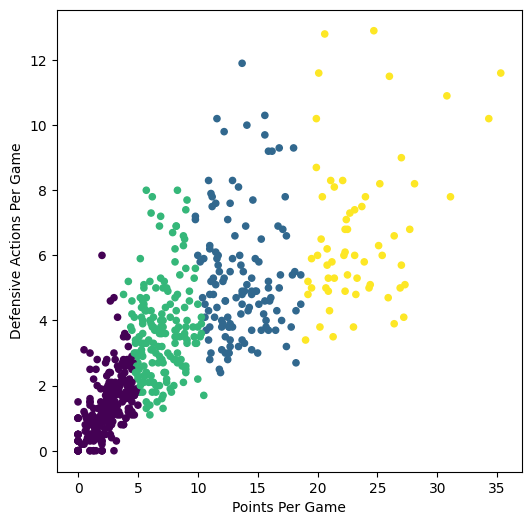

In [11]:
# Import KMeans
k = 4  # Find 4 clusters
kmeans = KMeans(n_clusters=k, random_state=4)
X = players[['PTS', 'def_actions']].values

# Fit and predict clusters
predictions = kmeans.fit_predict(X)

# Plot
fig = plt.figure(figsize=(6, 6))
ax = plt.axes()

# Scatter plot with different colors for each cluster
ax.scatter(players['PTS'], players['def_actions'], c=predictions, cmap='viridis', s=20)

ax.set_xlabel("Points Per Game")
ax.set_ylabel("Defensive Actions Per Game")
plt.show()


In [12]:
print(kmeans.cluster_centers_)

[[ 2.40884615  1.37346154]
 [13.60625     5.30546875]
 [ 6.97222222  3.67333333]
 [23.45806452  6.70645161]]


In [13]:
print('Players in the "low performing" cluster have an average of ',round(kmeans.cluster_centers_[0][0],1)
      ,' points per game and ',round(kmeans.cluster_centers_[0][1],1),' defensive actions per game respectively.')

Players in the "low performing" cluster have an average of  2.4  points per game and  1.4  defensive actions per game respectively.


In [14]:
print('Players in the "high performing" cluster have an average of ',round(kmeans.cluster_centers_[3][0],1)
      ,' points per game and ',round(kmeans.cluster_centers_[3][1],1),' defensive actions per game respectively.')

Players in the "high performing" cluster have an average of  23.5  points per game and  6.7  defensive actions per game respectively.


Our k = 4 kmeans clustering groups our players into different performing groups - take these clusters to be biased due to one simple fact: minutes played. Not all players can or should play all 48 minutes in a game, so these clusters present another tangent to our analysis - is it really fair to cluster players whomst are undisputed starters, and tend to play most minutes, along with 6th men, or role-playing bench players? Certainly not. 

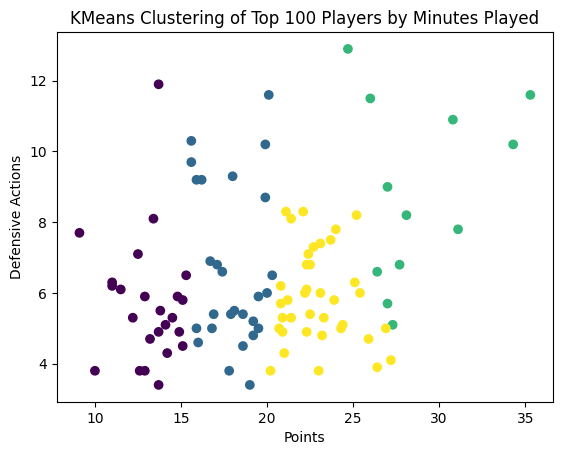

In [15]:
# Selecting top 100 players with most minutes
top_players = players.nlargest(100, 'MP')

# Selecting features
X = top_players[['PTS', 'def_actions']].values

# Creating KMeans instance
kmeans = KMeans(n_clusters=4, random_state=4)
predictions = kmeans.fit_predict(X)

# Creating scatter plot
plt.scatter(X[:, 0], X[:, 1], c=predictions)
plt.xlabel('Points')
plt.ylabel('Defensive Actions')
plt.title('KMeans Clustering of Top 100 Players by Minutes Played')
plt.show()


In [16]:
#creating an interactive plot to see which players are in each cluster. *Plotly library is required to run this code*
import plotly.express as px

# Converting top_players DataFrame to Plotly DataFrame
top_players_plotly = top_players.reset_index()

# Creating scatter plot using Plotly
fig = px.scatter(top_players_plotly, x='PTS', y='def_actions', color=predictions, hover_name='Player', title='KMeans Clustering of Top 100 Players by Minutes Played')

# Showing the plot
fig.show()


This clusterization of players serves as a better representation of our 4 different player types, taking into account onlye the top 100 players with most minutes played. This does reduce the correlation between variables, as any reduction of sample size would, however the 4 clusters accurately group different caliber of players.

Furthermore, this clusterization shows something interesting. There are no players in teams with a losing record in the orange cluster, or high performing players cluster. These players tend to be the center around which their teams revolve, highlighted by superstars such as Giannis Antetokoumpo, Luka Dončić and Joel Embiid.

## Part 2: Predicting April Games using a Random Forest Classifier.
Having understood different categories of players and the effects one player may have on their team, it's now time to start figuring out the remainder of the season. At the time of writing (March 31st 2024), only the Celtics have clinched playoff berth, and there are still quite a few playoff &/or play-in spots up for grabs. The following code is an exploration of predicitions for 14 days worth of games in April to determine how the season could end up and see which teams have better options at making the playoffs.

### Part 2.1: Scrapping the calendar:
The following dataframes were scrapped as text from [basketball-reference.com](https://www.basketball-reference.com/leagues/NBA_2024_games.html). Then they were converted into pandas DataFrames. Data was collected from the current calendar year, due to dimensionality concerns. The final df used for the random forest classification is a Merged dataframe containing advanced analytics from each team (also scrapped from [nba.com](https://www.nba.com/stats/teams/advanced) as text.) with around 50 columns. So for practical effects only 2024 games were taken into consideration for the RF Classification.

In [17]:
#Creating Games df 
text = """Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS,,,Attend.,Arena,Notes
Mon Apr 1 2024,7:00p,Boston Celtics,,Charlotte Hornets,,,,,Spectrum Center,
Mon Apr 1 2024,7:00p,Memphis Grizzlies,,Detroit Pistons,,,,,Little Caesars Arena,
Mon Apr 1 2024,7:00p,Brooklyn Nets,,Indiana Pacers,,,,,Gainbridge Fieldhouse,
Mon Apr 1 2024,7:00p,Portland Trail Blazers,,Orlando Magic,,,,,Amway Center,
Mon Apr 1 2024,8:00p,Atlanta Hawks,,Chicago Bulls,,,,,United Center,
Mon Apr 1 2024,8:00p,Phoenix Suns,,New Orleans Pelicans,,,,,Smoothie King Center,
Tue Apr 2 2024,7:00p,Los Angeles Lakers,,Toronto Raptors,,,,,Scotiabank Arena,
Tue Apr 2 2024,7:00p,Milwaukee Bucks,,Washington Wizards,,,,,Capital One Arena,
Tue Apr 2 2024,7:30p,New York Knicks,,Miami Heat,,,,,Kaseya Center,
Tue Apr 2 2024,7:30p,Oklahoma City Thunder,,Philadelphia 76ers,,,,,Wells Fargo Center,
Tue Apr 2 2024,8:00p,Houston Rockets,,Minnesota Timberwolves,,,,,Target Center,
Tue Apr 2 2024,9:00p,San Antonio Spurs,,Denver Nuggets,,,,,Ball Arena,
Tue Apr 2 2024,9:00p,Cleveland Cavaliers,,Utah Jazz,,,,,Delta Center,
Tue Apr 2 2024,10:00p,Dallas Mavericks,,Golden State Warriors,,,,,Chase Center,
Tue Apr 2 2024,10:00p,Los Angeles Clippers,,Sacramento Kings,,,,,Golden 1 Center,
Wed Apr 3 2024,7:00p,Portland Trail Blazers,,Charlotte Hornets,,,,,Spectrum Center,
Wed Apr 3 2024,7:00p,Los Angeles Lakers,,Washington Wizards,,,,,Capital One Arena,
Wed Apr 3 2024,7:30p,Detroit Pistons,,Atlanta Hawks,,,,,State Farm Arena,
Wed Apr 3 2024,7:30p,Oklahoma City Thunder,,Boston Celtics,,,,,TD Garden,
Wed Apr 3 2024,7:30p,Indiana Pacers,,Brooklyn Nets,,,,,Barclays Center,
Wed Apr 3 2024,8:00p,Memphis Grizzlies,,Milwaukee Bucks,,,,,Fiserv Forum,
Wed Apr 3 2024,8:00p,Toronto Raptors,,Minnesota Timberwolves,,,,,Target Center,
Wed Apr 3 2024,8:00p,Orlando Magic,,New Orleans Pelicans,,,,,Smoothie King Center,
Wed Apr 3 2024,10:00p,Cleveland Cavaliers,,Phoenix Suns,,,,,Footprint Center,
Thu Apr 4 2024,7:30p,Atlanta Hawks,,Dallas Mavericks,,,,,American Airlines Center,
Thu Apr 4 2024,7:30p,Philadelphia 76ers,,Miami Heat,,,,,Kaseya Center,
Thu Apr 4 2024,7:30p,Sacramento Kings,,New York Knicks,,,,,Madison Square Garden (IV),
Thu Apr 4 2024,8:00p,Golden State Warriors,,Houston Rockets,,,,,Toyota Center,
Thu Apr 4 2024,10:00p,Denver Nuggets,,Los Angeles Clippers,,,,,Crypto.com Arena,
Fri Apr 5 2024,7:00p,Orlando Magic,,Charlotte Hornets,,,,,Spectrum Center,
Fri Apr 5 2024,7:00p,Oklahoma City Thunder,,Indiana Pacers,,,,,Gainbridge Fieldhouse,
Fri Apr 5 2024,7:00p,Portland Trail Blazers,,Washington Wizards,,,,,Capital One Arena,
Fri Apr 5 2024,7:30p,Sacramento Kings,,Boston Celtics,,,,,TD Garden,
Fri Apr 5 2024,8:00p,New York Knicks,,Chicago Bulls,,,,,United Center,
Fri Apr 5 2024,8:00p,Miami Heat,,Houston Rockets,,,,,Toyota Center,
Fri Apr 5 2024,8:00p,Detroit Pistons,,Memphis Grizzlies,,,,,FedEx Forum,
Fri Apr 5 2024,8:00p,Toronto Raptors,,Milwaukee Bucks,,,,,Fiserv Forum,
Fri Apr 5 2024,8:00p,San Antonio Spurs,,New Orleans Pelicans,,,,,Smoothie King Center,
Fri Apr 5 2024,8:30p,Golden State Warriors,,Dallas Mavericks,,,,,American Airlines Center,
Fri Apr 5 2024,10:00p,Minnesota Timberwolves,,Phoenix Suns,,,,,Footprint Center,
Fri Apr 5 2024,10:30p,Utah Jazz,,Los Angeles Clippers,,,,,Crypto.com Arena,
Sat Apr 6 2024,3:30p,Cleveland Cavaliers,,Los Angeles Lakers,,,,,Crypto.com Arena,
Sat Apr 6 2024,7:00p,Detroit Pistons,,Brooklyn Nets,,,,,Barclays Center,
Sat Apr 6 2024,8:00p,Philadelphia 76ers,,Memphis Grizzlies,,,,,FedEx Forum,
Sat Apr 6 2024,9:00p,Atlanta Hawks,,Denver Nuggets,,,,,Ball Arena,
Sun Apr 7 2024,3:30p,Houston Rockets,,Dallas Mavericks,,,,,American Airlines Center,
Sun Apr 7 2024,3:30p,Cleveland Cavaliers,,Los Angeles Clippers,,,,,Crypto.com Arena,
Sun Apr 7 2024,5:00p,Miami Heat,,Indiana Pacers,,,,,Gainbridge Fieldhouse,
Sun Apr 7 2024,6:00p,Portland Trail Blazers,,Boston Celtics,,,,,TD Garden,
Sun Apr 7 2024,6:00p,Oklahoma City Thunder,,Charlotte Hornets,,,,,Spectrum Center,
Sun Apr 7 2024,6:00p,Chicago Bulls,,Orlando Magic,,,,,Amway Center,
Sun Apr 7 2024,6:00p,New Orleans Pelicans,,Phoenix Suns,,,,,Footprint Center,
Sun Apr 7 2024,6:00p,Washington Wizards,,Toronto Raptors,,,,,Scotiabank Arena,
Sun Apr 7 2024,7:00p,New York Knicks,,Milwaukee Bucks,,,,,Fiserv Forum,
Sun Apr 7 2024,7:00p,Philadelphia 76ers,,San Antonio Spurs,,,,,Frost Bank Center,
Sun Apr 7 2024,7:30p,Sacramento Kings,,Brooklyn Nets,,,,,Barclays Center,
Sun Apr 7 2024,8:30p,Utah Jazz,,Golden State Warriors,,,,,Chase Center,
Sun Apr 7 2024,10:00p,Minnesota Timberwolves,,Los Angeles Lakers,,,,,Crypto.com Arena,
Tue Apr 9 2024,7:00p,Dallas Mavericks,,Charlotte Hornets,,,,,Spectrum Center,
Tue Apr 9 2024,7:00p,Detroit Pistons,,Philadelphia 76ers,,,,,Wells Fargo Center,
Tue Apr 9 2024,7:00p,Indiana Pacers,,Toronto Raptors,,,,,Scotiabank Arena,
Tue Apr 9 2024,7:30p,Miami Heat,,Atlanta Hawks,,,,,State Farm Arena,
Tue Apr 9 2024,7:30p,Boston Celtics,,Milwaukee Bucks,,,,,Fiserv Forum,
Tue Apr 9 2024,8:00p,New York Knicks,,Chicago Bulls,,,,,United Center,
Tue Apr 9 2024,8:00p,Orlando Magic,,Houston Rockets,,,,,Toyota Center,
Tue Apr 9 2024,8:00p,San Antonio Spurs,,Memphis Grizzlies,,,,,FedEx Forum,
Tue Apr 9 2024,8:00p,Washington Wizards,,Minnesota Timberwolves,,,,,Target Center,
Tue Apr 9 2024,8:00p,Sacramento Kings,,Oklahoma City Thunder,,,,,Paycom Center,
Tue Apr 9 2024,9:00p,Denver Nuggets,,Utah Jazz,,,,,Delta Center,
Tue Apr 9 2024,10:00p,Golden State Warriors,,Los Angeles Lakers,,,,,Crypto.com Arena,
Tue Apr 9 2024,10:00p,Los Angeles Clippers,,Phoenix Suns,,,,,Footprint Center,
Tue Apr 9 2024,10:00p,New Orleans Pelicans,,Portland Trail Blazers,,,,,Moda Center,
Wed Apr 10 2024,7:00p,Memphis Grizzlies,,Cleveland Cavaliers,,,,,Rocket Mortgage Fieldhouse,
Wed Apr 10 2024,7:30p,Charlotte Hornets,,Atlanta Hawks,,,,,State Farm Arena,
Wed Apr 10 2024,7:30p,Toronto Raptors,,Brooklyn Nets,,,,,Barclays Center,
Wed Apr 10 2024,7:30p,Dallas Mavericks,,Miami Heat,,,,,Kaseya Center,
Wed Apr 10 2024,8:00p,Orlando Magic,,Milwaukee Bucks,,,,,Fiserv Forum,
Wed Apr 10 2024,8:00p,San Antonio Spurs,,Oklahoma City Thunder,,,,,Paycom Center,
Wed Apr 10 2024,10:00p,Minnesota Timberwolves,,Denver Nuggets,,,,,Ball Arena,
Wed Apr 10 2024,10:30p,Phoenix Suns,,Los Angeles Clippers,,,,,Crypto.com Arena,
Thu Apr 11 2024,7:00p,Chicago Bulls,,Detroit Pistons,,,,,Little Caesars Arena,
Thu Apr 11 2024,7:30p,New York Knicks,,Boston Celtics,,,,,TD Garden,
Thu Apr 11 2024,9:00p,Houston Rockets,,Utah Jazz,,,,,Delta Center,
Thu Apr 11 2024,10:00p,Golden State Warriors,,Portland Trail Blazers,,,,,Moda Center,
Thu Apr 11 2024,10:00p,New Orleans Pelicans,,Sacramento Kings,,,,,Golden 1 Center,
Fri Apr 12 2024,7:00p,Orlando Magic,,Philadelphia 76ers,,,,,Wells Fargo Center,
Fri Apr 12 2024,7:00p,Chicago Bulls,,Washington Wizards,,,,,Capital One Arena,
Fri Apr 12 2024,7:30p,Charlotte Hornets,,Boston Celtics,,,,,TD Garden,
Fri Apr 12 2024,7:30p,Indiana Pacers,,Cleveland Cavaliers,,,,,Rocket Mortgage Fieldhouse,
Fri Apr 12 2024,7:30p,Brooklyn Nets,,New York Knicks,,,,,Madison Square Garden (IV),
Fri Apr 12 2024,8:00p,Los Angeles Lakers,,Memphis Grizzlies,,,,,FedEx Forum,
Fri Apr 12 2024,8:00p,Toronto Raptors,,Miami Heat,,,,,Kaseya Center,
Fri Apr 12 2024,8:00p,Atlanta Hawks,,Minnesota Timberwolves,,,,,Target Center,
Fri Apr 12 2024,8:00p,Milwaukee Bucks,,Oklahoma City Thunder,,,,,Paycom Center,
Fri Apr 12 2024,8:00p,Denver Nuggets,,San Antonio Spurs,,,,,Frost Bank Center,
Fri Apr 12 2024,8:30p,Detroit Pistons,,Dallas Mavericks,,,,,American Airlines Center,
Fri Apr 12 2024,10:00p,New Orleans Pelicans,,Golden State Warriors,,,,,Chase Center,
Fri Apr 12 2024,10:00p,Houston Rockets,,Portland Trail Blazers,,,,,Moda Center,
Fri Apr 12 2024,10:30p,Utah Jazz,,Los Angeles Clippers,,,,,Crypto.com Arena,
Fri Apr 12 2024,10:30p,Phoenix Suns,,Sacramento Kings,,,,,Golden 1 Center,
Sun Apr 14 2024,1:00p,Washington Wizards,,Boston Celtics,,,,,TD Garden,
Sun Apr 14 2024,1:00p,Charlotte Hornets,,Cleveland Cavaliers,,,,,Rocket Mortgage Fieldhouse,
Sun Apr 14 2024,1:00p,Atlanta Hawks,,Indiana Pacers,,,,,Gainbridge Fieldhouse,
Sun Apr 14 2024,1:00p,Toronto Raptors,,Miami Heat,,,,,Kaseya Center,
Sun Apr 14 2024,1:00p,Chicago Bulls,,New York Knicks,,,,,Madison Square Garden (IV),
Sun Apr 14 2024,1:00p,Milwaukee Bucks,,Orlando Magic,,,,,Amway Center,
Sun Apr 14 2024,1:00p,Brooklyn Nets,,Philadelphia 76ers,,,,,Wells Fargo Center,
Sun Apr 14 2024,3:30p,Utah Jazz,,Golden State Warriors,,,,,Chase Center,
Sun Apr 14 2024,3:30p,Houston Rockets,,Los Angeles Clippers,,,,,Crypto.com Arena,
Sun Apr 14 2024,3:30p,Denver Nuggets,,Memphis Grizzlies,,,,,FedEx Forum,
Sun Apr 14 2024,3:30p,Phoenix Suns,,Minnesota Timberwolves,,,,,Target Center,
Sun Apr 14 2024,3:30p,Los Angeles Lakers,,New Orleans Pelicans,,,,,Smoothie King Center,
Sun Apr 14 2024,3:30p,Dallas Mavericks,,Oklahoma City Thunder,,,,,Paycom Center,
Sun Apr 14 2024,3:30p,Portland Trail Blazers,,Sacramento Kings,,,,,Golden 1 Center,
Sun Apr 14 2024,3:30p,Detroit Pistons,,San Antonio Spurs,,,,,Frost Bank Center,"""

# Splitting the text into lines and then split each line by comma
lines = [line.strip().split(',') for line in text.strip().split('\n')]

# Creating a DataFrame from the list of lists
AprilGames = pd.DataFrame(lines[1:], columns=lines[0])


# Dropping the empty columns
AprilGames = AprilGames.drop(columns=['', '', '', ''])

# Dropping the 'Notes' column
AprilGames = AprilGames.drop(columns=['Notes'])

AprilGames




,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS,Attend.,Arena
0,Mon Apr 1 2024,7:00p,Boston Celtics,,Charlotte Hornets,,,Spectrum Center
1,Mon Apr 1 2024,7:00p,Memphis Grizzlies,,Detroit Pistons,,,Little Caesars Arena
2,Mon Apr 1 2024,7:00p,Brooklyn Nets,,Indiana Pacers,,,Gainbridge Fieldhouse
3,Mon Apr 1 2024,7:00p,Portland Trail Blazers,,Orlando Magic,,,Amway Center
4,Mon Apr 1 2024,8:00p,Atlanta Hawks,,Chicago Bulls,,,United Center
...,...,...,...,...,...,...,...,...
110,Sun Apr 14 2024,3:30p,Phoenix Suns,,Minnesota Timberwolves,,,Target Center
111,Sun Apr 14 2024,3:30p,Los Angeles Lakers,,New Orleans Pelicans,,,Smoothie King Center
112,Sun Apr 14 2024,3:30p,Dallas Mavericks,,Oklahoma City Thunder,,,Paycom Center
113,Sun Apr 14 2024,3:30p,Portland Trail Blazers,,Sacramento Kings,,,Golden 1 Center


In [18]:

#Creating Games df 
text = """Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS,,,Attend.,Arena,Notes
Mon Jan 1 2024,3:00p,Minnesota Timberwolves,106,New York Knicks,112,Box Score,,19812,Madison Square Garden (IV),
Mon Jan 1 2024,7:30p,Cleveland Cavaliers,121,Toronto Raptors,124,Box Score,,19800,Scotiabank Arena,
Mon Jan 1 2024,8:00p,Detroit Pistons,113,Houston Rockets,136,Box Score,,18055,Toyota Center,
Mon Jan 1 2024,8:00p,Indiana Pacers,122,Milwaukee Bucks,113,Box Score,,17922,Fiserv Forum,
Mon Jan 1 2024,9:00p,Charlotte Hornets,93,Denver Nuggets,111,Box Score,,19625,Ball Arena,
Mon Jan 1 2024,9:00p,Portland Trail Blazers,88,Phoenix Suns,109,Box Score,,17071,Footprint Center,
Mon Jan 1 2024,9:00p,Dallas Mavericks,90,Utah Jazz,127,Box Score,,18206,Delta Center,
Mon Jan 1 2024,10:30p,Miami Heat,104,Los Angeles Clippers,121,Box Score,,19370,Crypto.com Arena,
Tue Jan 2 2024,7:00p,Chicago Bulls,97,Philadelphia 76ers,110,Box Score,,19772,Wells Fargo Center,
Tue Jan 2 2024,8:00p,San Antonio Spurs,98,Memphis Grizzlies,106,Box Score,,17794,FedEx Forum,
Tue Jan 2 2024,8:00p,Brooklyn Nets,85,New Orleans Pelicans,112,Box Score,,16253,Smoothie King Center,
Tue Jan 2 2024,8:00p,Boston Celtics,123,Oklahoma City Thunder,127,Box Score,,18203,Paycom Center,
Tue Jan 2 2024,10:00p,Orlando Magic,115,Golden State Warriors,121,Box Score,,18064,Chase Center,
Tue Jan 2 2024,10:00p,Charlotte Hornets,111,Sacramento Kings,104,Box Score,,17832,Golden 1 Center,
Wed Jan 3 2024,7:00p,Washington Wizards,101,Cleveland Cavaliers,140,Box Score,,19432,Rocket Mortgage Fieldhouse,
Wed Jan 3 2024,7:00p,Milwaukee Bucks,130,Indiana Pacers,142,Box Score,,17274,Gainbridge Fieldhouse,
Wed Jan 3 2024,7:30p,Oklahoma City Thunder,138,Atlanta Hawks,141,Box Score,,17770,State Farm Arena,
Wed Jan 3 2024,8:00p,Brooklyn Nets,101,Houston Rockets,112,Box Score,,16563,Toyota Center,
Wed Jan 3 2024,8:00p,Toronto Raptors,116,Memphis Grizzlies,111,Box Score,,16385,FedEx Forum,
Wed Jan 3 2024,8:00p,New Orleans Pelicans,117,Minnesota Timberwolves,106,Box Score,,18024,Target Center,
Wed Jan 3 2024,8:30p,Portland Trail Blazers,97,Dallas Mavericks,126,Box Score,,20077,American Airlines Center,
Wed Jan 3 2024,8:30p,Chicago Bulls,100,New York Knicks,116,Box Score,,19812,Madison Square Garden (IV),
Wed Jan 3 2024,9:00p,Los Angeles Clippers,131,Phoenix Suns,122,Box Score,,17071,Footprint Center,
Wed Jan 3 2024,9:00p,Detroit Pistons,148,Utah Jazz,154,Box Score,OT,18206,Delta Center,
Wed Jan 3 2024,10:00p,Miami Heat,110,Los Angeles Lakers,96,Box Score,,18997,Crypto.com Arena,
Wed Jan 3 2024,10:00p,Orlando Magic,135,Sacramento Kings,138,Box Score,2OT,17832,Golden 1 Center,
Thu Jan 4 2024,7:30p,Milwaukee Bucks,125,San Antonio Spurs,121,Box Score,,19082,Frost Bank Center,
Thu Jan 4 2024,10:00p,Denver Nuggets,130,Golden State Warriors,127,Box Score,,18064,Chase Center,
Fri Jan 5 2024,7:00p,Utah Jazz,97,Boston Celtics,126,Box Score,,19156,TD Garden,
Fri Jan 5 2024,7:00p,Atlanta Hawks,116,Indiana Pacers,150,Box Score,,17274,Gainbridge Fieldhouse,
Fri Jan 5 2024,7:30p,Oklahoma City Thunder,115,Brooklyn Nets,124,Box Score,,18147,Barclays Center,
Fri Jan 5 2024,7:30p,Washington Wizards,90,Cleveland Cavaliers,114,Box Score,,19432,Rocket Mortgage Fieldhouse,
Fri Jan 5 2024,7:30p,New York Knicks,128,Philadelphia 76ers,92,Box Score,,20461,Wells Fargo Center,
Fri Jan 5 2024,8:00p,Charlotte Hornets,91,Chicago Bulls,104,Box Score,,21345,United Center,
Fri Jan 5 2024,8:00p,Minnesota Timberwolves,122,Houston Rockets,95,Box Score,,18055,Toyota Center,
Fri Jan 5 2024,8:00p,Los Angeles Clippers,111,New Orleans Pelicans,95,Box Score,,18329,Smoothie King Center,
Fri Jan 5 2024,8:30p,Portland Trail Blazers,103,Dallas Mavericks,139,Box Score,,20162,American Airlines Center,
Fri Jan 5 2024,9:00p,Orlando Magic,122,Denver Nuggets,120,Box Score,,19659,Ball Arena,
Fri Jan 5 2024,9:00p,Miami Heat,97,Phoenix Suns,113,Box Score,,17071,Footprint Center,
Fri Jan 5 2024,10:00p,Detroit Pistons,109,Golden State Warriors,113,Box Score,,18064,Chase Center,
Fri Jan 5 2024,10:00p,Memphis Grizzlies,127,Los Angeles Lakers,113,Box Score,,18997,Crypto.com Arena,
Fri Jan 5 2024,10:00p,Toronto Raptors,130,Sacramento Kings,135,Box Score,,17941,Golden 1 Center,
Sat Jan 6 2024,7:00p,Boston Celtics,118,Indiana Pacers,101,Box Score,,17274,Gainbridge Fieldhouse,
Sat Jan 6 2024,7:00p,New York Knicks,121,Washington Wizards,105,Box Score,,20333,Capital One Arena,
Sat Jan 6 2024,7:30p,Utah Jazz,120,Philadelphia 76ers,109,Box Score,,20278,Wells Fargo Center,
Sat Jan 6 2024,8:00p,Milwaukee Bucks,108,Houston Rockets,112,Box Score,,18055,Toyota Center,
Sun Jan 7 2024,1:00p,San Antonio Spurs,115,Cleveland Cavaliers,117,Box Score,,19432,Rocket Mortgage Fieldhouse,
Sun Jan 7 2024,3:00p,Portland Trail Blazers,134,Brooklyn Nets,127,Box Score,OT,17732,Barclays Center,
Sun Jan 7 2024,6:00p,Atlanta Hawks,110,Orlando Magic,117,Box Score,OT,19349,Amway Center,
Sun Jan 7 2024,6:00p,New Orleans Pelicans,133,Sacramento Kings,100,Box Score,,17832,Golden 1 Center,
Sun Jan 7 2024,7:30p,Minnesota Timberwolves,108,Dallas Mavericks,115,Box Score,,20111,American Airlines Center,
Sun Jan 7 2024,8:00p,Detroit Pistons,114,Denver Nuggets,131,Box Score,,19623,Ball Arena,
Sun Jan 7 2024,8:00p,Memphis Grizzlies,121,Phoenix Suns,115,Box Score,,17071,Footprint Center,
Sun Jan 7 2024,8:30p,Toronto Raptors,133,Golden State Warriors,118,Box Score,,18064,Chase Center,
Sun Jan 7 2024,9:30p,Los Angeles Clippers,103,Los Angeles Lakers,106,Box Score,,18997,Crypto.com Arena,
Mon Jan 8 2024,7:00p,Chicago Bulls,119,Charlotte Hornets,112,Box Score,OT,14418,Spectrum Center,
Mon Jan 8 2024,7:00p,Boston Celtics,131,Indiana Pacers,133,Box Score,,16009,Gainbridge Fieldhouse,
Mon Jan 8 2024,7:00p,Oklahoma City Thunder,136,Washington Wizards,128,Box Score,,15297,Capital One Arena,
Mon Jan 8 2024,7:30p,Houston Rockets,113,Miami Heat,120,Box Score,,19694,Kaseya Center,
Mon Jan 8 2024,8:00p,Utah Jazz,132,Milwaukee Bucks,116,Box Score,,17341,Fiserv Forum,
Mon Jan 8 2024,10:30p,Phoenix Suns,111,Los Angeles Clippers,138,Box Score,,19370,Crypto.com Arena,
Tue Jan 9 2024,7:00p,Sacramento Kings,131,Detroit Pistons,110,Box Score,,13992,Little Caesars Arena,
Tue Jan 9 2024,7:00p,Minnesota Timberwolves,113,Orlando Magic,92,Box Score,,19223,Amway Center,
Tue Jan 9 2024,7:30p,Portland Trail Blazers,84,New York Knicks,112,Box Score,,19812,Madison Square Garden (IV),
Tue Jan 9 2024,8:30p,Memphis Grizzlies,120,Dallas Mavericks,103,Box Score,,20116,American Airlines Center,
Tue Jan 9 2024,10:30p,Toronto Raptors,131,Los Angeles Lakers,132,Box Score,,18997,Crypto.com Arena,
Wed Jan 10 2024,7:00p,Minnesota Timberwolves,120,Boston Celtics,127,Box Score,OT,19156,TD Garden,
Wed Jan 10 2024,7:00p,Sacramento Kings,123,Charlotte Hornets,98,Box Score,,14173,Spectrum Center,
Wed Jan 10 2024,7:00p,San Antonio Spurs,130,Detroit Pistons,108,Box Score,,17833,Little Caesars Arena,
Wed Jan 10 2024,7:00p,Washington Wizards,104,Indiana Pacers,112,Box Score,,15721,Gainbridge Fieldhouse,
Wed Jan 10 2024,7:30p,Philadelphia 76ers,132,Atlanta Hawks,139,Box Score,OT,16089,State Farm Arena,
Wed Jan 10 2024,7:30p,Oklahoma City Thunder,128,Miami Heat,120,Box Score,,19636,Kaseya Center,
Wed Jan 10 2024,8:00p,Houston Rockets,119,Chicago Bulls,124,Box Score,OT,21149,United Center,
Wed Jan 10 2024,8:30p,New Orleans Pelicans,141,Golden State Warriors,105,Box Score,,18064,Chase Center,
Wed Jan 10 2024,10:00p,Denver Nuggets,111,Utah Jazz,124,Box Score,,18206,Delta Center,
Wed Jan 10 2024,10:30p,Toronto Raptors,120,Los Angeles Clippers,126,Box Score,,19370,Crypto.com Arena,
Thu Jan 11 2024,2:00p,Brooklyn Nets,102,Cleveland Cavaliers,111,Box Score,,15887,AccorHotels Arena,at Paris France
Thu Jan 11 2024,7:30p,Boston Celtics,102,Milwaukee Bucks,135,Box Score,,17781,Fiserv Forum,
Thu Jan 11 2024,8:00p,Portland Trail Blazers,77,Oklahoma City Thunder,139,Box Score,,15828,Paycom Center,
Thu Jan 11 2024,8:30p,New York Knicks,124,Dallas Mavericks,128,Box Score,,20040,American Airlines Center,
Thu Jan 11 2024,10:00p,Phoenix Suns,127,Los Angeles Lakers,109,Box Score,,18416,Crypto.com Arena,
Fri Jan 12 2024,7:30p,Indiana Pacers,126,Atlanta Hawks,108,Box Score,,15596,State Farm Arena,
Fri Jan 12 2024,7:30p,Houston Rockets,112,Detroit Pistons,110,Box Score,,13987,Little Caesars Arena,
Fri Jan 12 2024,7:30p,Sacramento Kings,93,Philadelphia 76ers,112,Box Score,,19766,Wells Fargo Center,
Fri Jan 12 2024,8:00p,Golden State Warriors,140,Chicago Bulls,131,Box Score,,21153,United Center,
Fri Jan 12 2024,8:00p,Los Angeles Clippers,128,Memphis Grizzlies,119,Box Score,,16617,FedEx Forum,
Fri Jan 12 2024,8:00p,Orlando Magic,96,Miami Heat,99,Box Score,,19650,Kaseya Center,
Fri Jan 12 2024,8:00p,Portland Trail Blazers,93,Minnesota Timberwolves,116,Box Score,,18024,Target Center,
Fri Jan 12 2024,8:00p,Charlotte Hornets,99,San Antonio Spurs,135,Box Score,,18073,Frost Bank Center,
Fri Jan 12 2024,9:30p,Toronto Raptors,113,Utah Jazz,145,Box Score,,18206,Delta Center,
Fri Jan 12 2024,10:00p,New Orleans Pelicans,113,Denver Nuggets,125,Box Score,,19638,Ball Arena,
Sat Jan 13 2024,7:00p,Houston Rockets,113,Boston Celtics,145,Box Score,,19156,TD Garden,
Sat Jan 13 2024,7:30p,Washington Wizards,127,Atlanta Hawks,99,Box Score,,17108,State Farm Arena,
Sat Jan 13 2024,8:00p,New York Knicks,106,Memphis Grizzlies,94,Box Score,,16598,FedEx Forum,
Sat Jan 13 2024,8:00p,Golden State Warriors,118,Milwaukee Bucks,129,Box Score,,18009,Fiserv Forum,
Sat Jan 13 2024,8:00p,Orlando Magic,100,Oklahoma City Thunder,112,Box Score,,18203,Paycom Center,
Sat Jan 13 2024,8:30p,New Orleans Pelicans,118,Dallas Mavericks,108,Box Score,,20155,American Airlines Center,
Sat Jan 13 2024,8:30p,Chicago Bulls,122,San Antonio Spurs,116,Box Score,,18354,Frost Bank Center,
Sat Jan 13 2024,9:30p,Los Angeles Lakers,125,Utah Jazz,132,Box Score,,18206,Delta Center,
Sun Jan 14 2024,3:30p,Indiana Pacers,109,Denver Nuggets,117,Box Score,,19631,Ball Arena,
Sun Jan 14 2024,6:00p,Charlotte Hornets,87,Miami Heat,104,Box Score,,19831,Kaseya Center,
Sun Jan 14 2024,7:00p,Sacramento Kings,142,Milwaukee Bucks,143,Box Score,OT,17612,Fiserv Forum,
Sun Jan 14 2024,7:00p,Los Angeles Clippers,105,Minnesota Timberwolves,109,Box Score,,18024,Target Center,
Sun Jan 14 2024,9:00p,Phoenix Suns,127,Portland Trail Blazers,116,Box Score,,18071,Moda Center,
Mon Jan 15 2024,1:00p,Houston Rockets,115,Philadelphia 76ers,124,Box Score,,20822,Wells Fargo Center,
Mon Jan 15 2024,2:30p,New Orleans Pelicans,120,Dallas Mavericks,125,Box Score,,20010,American Airlines Center,
Mon Jan 15 2024,3:00p,Orlando Magic,98,New York Knicks,94,Box Score,,19812,Madison Square Garden (IV),
Mon Jan 15 2024,3:00p,Detroit Pistons,129,Washington Wizards,117,Box Score,,15156,Capital One Arena,
Mon Jan 15 2024,3:30p,San Antonio Spurs,99,Atlanta Hawks,109,Box Score,,17447,State Farm Arena,
Mon Jan 15 2024,6:00p,Golden State Warriors,107,Memphis Grizzlies,116,Box Score,,16612,FedEx Forum,
Mon Jan 15 2024,7:00p,Chicago Bulls,91,Cleveland Cavaliers,109,Box Score,,19432,Rocket Mortgage Fieldhouse,
Mon Jan 15 2024,7:30p,Miami Heat,96,Brooklyn Nets,95,Box Score,OT,17893,Barclays Center,
Mon Jan 15 2024,7:30p,Boston Celtics,105,Toronto Raptors,96,Box Score,,19278,Scotiabank Arena,
Mon Jan 15 2024,9:00p,Indiana Pacers,105,Utah Jazz,132,Box Score,,18206,Delta Center,
Mon Jan 15 2024,10:30p,Oklahoma City Thunder,105,Los Angeles Lakers,112,Box Score,,18997,Crypto.com Arena,
Tue Jan 16 2024,7:30p,Denver Nuggets,121,Philadelphia 76ers,126,Box Score,,19775,Wells Fargo Center,
Tue Jan 16 2024,9:00p,Sacramento Kings,117,Phoenix Suns,119,Box Score,,17071,Footprint Center,
Tue Jan 16 2024,10:00p,Oklahoma City Thunder,117,Los Angeles Clippers,128,Box Score,,19370,Crypto.com Arena,
Wed Jan 17 2024,7:00p,Minnesota Timberwolves,124,Detroit Pistons,117,Box Score,,16022,Little Caesars Arena,
Wed Jan 17 2024,7:30p,Orlando Magic,104,Atlanta Hawks,106,Box Score,,14541,State Farm Arena,
Wed Jan 17 2024,7:30p,San Antonio Spurs,98,Boston Celtics,117,Box Score,,19156,TD Garden,
Wed Jan 17 2024,7:30p,Milwaukee Bucks,95,Cleveland Cavaliers,135,Box Score,,19432,Rocket Mortgage Fieldhouse,
Wed Jan 17 2024,7:30p,Houston Rockets,94,New York Knicks,109,Box Score,,19439,Madison Square Garden (IV),
Wed Jan 17 2024,7:30p,Miami Heat,97,Toronto Raptors,121,Box Score,,19631,Scotiabank Arena,
Wed Jan 17 2024,8:00p,Charlotte Hornets,112,New Orleans Pelicans,132,Box Score,,16093,Smoothie King Center,
Wed Jan 17 2024,8:30p,Dallas Mavericks,110,Los Angeles Lakers,127,Box Score,,18338,Crypto.com Arena,
Wed Jan 17 2024,10:00p,Brooklyn Nets,103,Portland Trail Blazers,105,Box Score,,17021,Moda Center,
Thu Jan 18 2024,7:30p,Washington Wizards,109,New York Knicks,113,Box Score,,19466,Madison Square Garden (IV),
Thu Jan 18 2024,7:30p,Chicago Bulls,116,Toronto Raptors,110,Box Score,,19312,Scotiabank Arena,
Thu Jan 18 2024,9:00p,Oklahoma City Thunder,134,Utah Jazz,129,Box Score,,18206,Delta Center,
Thu Jan 18 2024,10:00p,Memphis Grizzlies,103,Minnesota Timberwolves,118,Box Score,,18024,Target Center,
Thu Jan 18 2024,10:00p,Indiana Pacers,126,Sacramento Kings,121,Box Score,,17832,Golden 1 Center,
Fri Jan 19 2024,7:00p,San Antonio Spurs,120,Charlotte Hornets,124,Box Score,,19093,Spectrum Center,
Fri Jan 19 2024,7:00p,Philadelphia 76ers,124,Orlando Magic,109,Box Score,,19063,Amway Center,
Fri Jan 19 2024,7:30p,Denver Nuggets,102,Boston Celtics,100,Box Score,,19156,TD Garden,
Fri Jan 19 2024,8:00p,Atlanta Hawks,109,Miami Heat,108,Box Score,,20040,Kaseya Center,
Fri Jan 19 2024,8:00p,Phoenix Suns,123,New Orleans Pelicans,109,Box Score,,18686,Smoothie King Center,
Fri Jan 19 2024,10:00p,Indiana Pacers,115,Portland Trail Blazers,118,Box Score,,18595,Moda Center,
Fri Jan 19 2024,10:30p,Brooklyn Nets,130,Los Angeles Lakers,112,Box Score,,18997,Crypto.com Arena,
Sat Jan 20 2024,3:00p,Milwaukee Bucks,141,Detroit Pistons,135,Box Score,,19996,Little Caesars Arena,
Sat Jan 20 2024,7:00p,Philadelphia 76ers,97,Charlotte Hornets,89,Box Score,,18261,Spectrum Center,
Sat Jan 20 2024,7:00p,San Antonio Spurs,131,Washington Wizards,127,Box Score,,17922,Capital One Arena,
Sat Jan 20 2024,7:30p,Cleveland Cavaliers,116,Atlanta Hawks,95,Box Score,,17047,State Farm Arena,
Sat Jan 20 2024,7:30p,Toronto Raptors,100,New York Knicks,126,Box Score,,19812,Madison Square Garden (IV),
Sat Jan 20 2024,8:00p,Memphis Grizzlies,96,Chicago Bulls,125,Box Score,,21441,United Center,
Sat Jan 20 2024,8:00p,Utah Jazz,126,Houston Rockets,127,Box Score,OT,16618,Toyota Center,
Sat Jan 20 2024,8:00p,Oklahoma City Thunder,102,Minnesota Timberwolves,97,Box Score,,,Target Center,
Sun Jan 21 2024,3:30p,Brooklyn Nets,114,Los Angeles Clippers,125,Box Score,,19370,Crypto.com Arena,
Sun Jan 21 2024,6:00p,Miami Heat,87,Orlando Magic,105,Box Score,,18102,Amway Center,
Sun Jan 21 2024,6:00p,Denver Nuggets,113,Washington Wizards,104,Box Score,,17107,Capital One Arena,
Sun Jan 21 2024,7:00p,Boston Celtics,116,Houston Rockets,107,Box Score,,18055,Toyota Center,
Sun Jan 21 2024,8:00p,Indiana Pacers,110,Phoenix Suns,117,Box Score,,17071,Footprint Center,
Sun Jan 21 2024,10:00p,Portland Trail Blazers,110,Los Angeles Lakers,134,Box Score,,18997,Crypto.com Arena,
Mon Jan 22 2024,7:00p,Milwaukee Bucks,122,Detroit Pistons,113,Box Score,,17201,Little Caesars Arena,
Mon Jan 22 2024,7:00p,Cleveland Cavaliers,126,Orlando Magic,99,Box Score,,19301,Amway Center,
Mon Jan 22 2024,7:00p,San Antonio Spurs,123,Philadelphia 76ers,133,Box Score,,20511,Wells Fargo Center,
Mon Jan 22 2024,7:30p,Memphis Grizzlies,108,Toronto Raptors,100,Box Score,,18577,Scotiabank Arena,
Mon Jan 22 2024,8:00p,Charlotte Hornets,128,Minnesota Timberwolves,125,Box Score,,18024,Target Center,
Mon Jan 22 2024,8:30p,Boston Celtics,119,Dallas Mavericks,110,Box Score,,20277,American Airlines Center,
Mon Jan 22 2024,9:00p,Chicago Bulls,113,Phoenix Suns,115,Box Score,,17071,Footprint Center,
Mon Jan 22 2024,10:00p,Atlanta Hawks,107,Sacramento Kings,122,Box Score,,17832,Golden 1 Center,
Tue Jan 23 2024,7:00p,Denver Nuggets,114,Indiana Pacers,109,Box Score,,16004,Gainbridge Fieldhouse,
Tue Jan 23 2024,7:30p,New York Knicks,108,Brooklyn Nets,103,Box Score,,17732,Barclays Center,
Tue Jan 23 2024,8:00p,Utah Jazz,124,New Orleans Pelicans,153,Box Score,,16032,Smoothie King Center,
Tue Jan 23 2024,8:00p,Portland Trail Blazers,109,Oklahoma City Thunder,111,Box Score,,15874,Paycom Center,
Tue Jan 23 2024,10:00p,Los Angeles Lakers,116,Los Angeles Clippers,127,Box Score,,19370,Crypto.com Arena,
Wed Jan 24 2024,7:00p,Charlotte Hornets,106,Detroit Pistons,113,Box Score,,15020,Little Caesars Arena,
Wed Jan 24 2024,7:00p,Minnesota Timberwolves,118,Washington Wizards,107,Box Score,,15446,Capital One Arena,
Wed Jan 24 2024,7:30p,Memphis Grizzlies,105,Miami Heat,96,Box Score,,19600,Kaseya Center,
Wed Jan 24 2024,8:00p,Portland Trail Blazers,137,Houston Rockets,131,Box Score,OT,18055,Toyota Center,
Wed Jan 24 2024,8:00p,Cleveland Cavaliers,116,Milwaukee Bucks,126,Box Score,,17510,Fiserv Forum,
Wed Jan 24 2024,8:30p,Phoenix Suns,132,Dallas Mavericks,109,Box Score,,20202,American Airlines Center,
Wed Jan 24 2024,9:30p,Oklahoma City Thunder,140,San Antonio Spurs,114,Box Score,,18130,Frost Bank Center,
Wed Jan 24 2024,10:00p,Atlanta Hawks,112,Golden State Warriors,134,Box Score,,18064,Chase Center,
Thu Jan 25 2024,7:00p,Philadelphia 76ers,122,Indiana Pacers,134,Box Score,,15699,Gainbridge Fieldhouse,
Thu Jan 25 2024,7:00p,Utah Jazz,123,Washington Wizards,108,Box Score,,14027,Capital One Arena,
Thu Jan 25 2024,7:30p,Minnesota Timberwolves,96,Brooklyn Nets,94,Box Score,,17732,Barclays Center,
Thu Jan 25 2024,7:30p,Boston Celtics,143,Miami Heat,110,Box Score,,20074,Kaseya Center,
Thu Jan 25 2024,7:30p,Denver Nuggets,84,New York Knicks,122,Box Score,,19812,Madison Square Garden (IV),
Thu Jan 25 2024,10:00p,Sacramento Kings,134,Golden State Warriors,133,Box Score,,18064,Chase Center,
Thu Jan 25 2024,10:30p,Chicago Bulls,132,Los Angeles Lakers,141,Box Score,,18997,Crypto.com Arena,
Fri Jan 26 2024,7:00p,Dallas Mavericks,148,Atlanta Hawks,143,Box Score,,16149,State Farm Arena,
Fri Jan 26 2024,7:00p,Houston Rockets,138,Charlotte Hornets,104,Box Score,,16164,Spectrum Center,
Fri Jan 26 2024,7:00p,Phoenix Suns,131,Indiana Pacers,133,Box Score,,17274,Gainbridge Fieldhouse,
Fri Jan 26 2024,7:30p,Los Angeles Clippers,127,Toronto Raptors,107,Box Score,,19800,Scotiabank Arena,
Fri Jan 26 2024,8:00p,Orlando Magic,106,Memphis Grizzlies,107,Box Score,,16823,FedEx Forum,
Fri Jan 26 2024,8:00p,Cleveland Cavaliers,112,Milwaukee Bucks,100,Box Score,,17855,Fiserv Forum,
Fri Jan 26 2024,8:00p,Oklahoma City Thunder,107,New Orleans Pelicans,83,Box Score,,18624,Smoothie King Center,
Fri Jan 26 2024,9:30p,Portland Trail Blazers,100,San Antonio Spurs,116,Box Score,,17274,Frost Bank Center,
Sat Jan 27 2024,12:00p,Washington Wizards,118,Detroit Pistons,104,Box Score,,16922,Little Caesars Arena,
Sat Jan 27 2024,3:00p,Miami Heat,109,New York Knicks,125,Box Score,,19812,Madison Square Garden (IV),
Sat Jan 27 2024,5:30p,Philadelphia 76ers,105,Denver Nuggets,111,Box Score,,19805,Ball Arena,
Sat Jan 27 2024,6:00p,Houston Rockets,104,Brooklyn Nets,106,Box Score,,17732,Barclays Center,
Sat Jan 27 2024,7:00p,Los Angeles Clippers,115,Boston Celtics,96,Box Score,,19156,TD Garden,
Sat Jan 27 2024,7:00p,Utah Jazz,134,Charlotte Hornets,122,Box Score,,17633,Spectrum Center,
Sat Jan 27 2024,8:00p,New Orleans Pelicans,117,Milwaukee Bucks,141,Box Score,,17940,Fiserv Forum,
Sat Jan 27 2024,8:30p,Los Angeles Lakers,145,Golden State Warriors,144,Box Score,2OT,18064,Chase Center,
Sat Jan 27 2024,8:30p,Minnesota Timberwolves,112,San Antonio Spurs,113,Box Score,,17726,Frost Bank Center,
Sat Jan 27 2024,9:00p,Sacramento Kings,120,Dallas Mavericks,115,Box Score,,20373,American Airlines Center,
Sun Jan 28 2024,2:00p,Oklahoma City Thunder,104,Detroit Pistons,120,Box Score,,16861,Little Caesars Arena,
Sun Jan 28 2024,3:30p,Memphis Grizzlies,110,Indiana Pacers,116,Box Score,,16519,Gainbridge Fieldhouse,
Sun Jan 28 2024,6:00p,Toronto Raptors,125,Atlanta Hawks,126,Box Score,,15658,State Farm Arena,
Sun Jan 28 2024,6:00p,Phoenix Suns,98,Orlando Magic,113,Box Score,,18823,Amway Center,
Sun Jan 28 2024,9:00p,Chicago Bulls,104,Portland Trail Blazers,96,Box Score,,17899,Moda Center,
Mon Jan 29 2024,7:00p,New York Knicks,113,Charlotte Hornets,92,Box Score,,15546,Spectrum Center,
Mon Jan 29 2024,7:00p,Los Angeles Clippers,108,Cleveland Cavaliers,118,Box Score,,19432,Rocket Mortgage Fieldhouse,
Mon Jan 29 2024,7:30p,New Orleans Pelicans,112,Boston Celtics,118,Box Score,,19156,TD Garden,
Mon Jan 29 2024,7:30p,Utah Jazz,114,Brooklyn Nets,147,Box Score,,16054,Barclays Center,
Mon Jan 29 2024,7:30p,Phoenix Suns,118,Miami Heat,105,Box Score,,19600,Kaseya Center,
Mon Jan 29 2024,8:00p,Los Angeles Lakers,119,Houston Rockets,135,Box Score,,18055,Toyota Center,
Mon Jan 29 2024,8:00p,Sacramento Kings,103,Memphis Grizzlies,94,Box Score,,15333,FedEx Forum,
Mon Jan 29 2024,8:00p,Minnesota Timberwolves,107,Oklahoma City Thunder,101,Box Score,,16870,Paycom Center,
Mon Jan 29 2024,8:00p,Washington Wizards,118,San Antonio Spurs,113,Box Score,,17020,Frost Bank Center,
Mon Jan 29 2024,8:30p,Orlando Magic,129,Dallas Mavericks,131,Box Score,,20020,American Airlines Center,
Mon Jan 29 2024,9:00p,Milwaukee Bucks,107,Denver Nuggets,113,Box Score,,19801,Ball Arena,
Mon Jan 29 2024,10:00p,Philadelphia 76ers,104,Portland Trail Blazers,130,Box Score,,17128,Moda Center,
Tue Jan 30 2024,7:30p,Los Angeles Lakers,122,Atlanta Hawks,138,Box Score,,17871,State Farm Arena,
Tue Jan 30 2024,7:30p,Indiana Pacers,124,Boston Celtics,129,Box Score,,19156,TD Garden,
Tue Jan 30 2024,7:30p,Utah Jazz,103,New York Knicks,118,Box Score,,19133,Madison Square Garden (IV),
Tue Jan 30 2024,8:00p,Toronto Raptors,118,Chicago Bulls,107,Box Score,,21259,United Center,
Tue Jan 30 2024,10:00p,Philadelphia 76ers,107,Golden State Warriors,119,Box Score,,18064,Chase Center,
Wed Jan 31 2024,7:00p,Chicago Bulls,117,Charlotte Hornets,110,Box Score,,13712,Spectrum Center,
Wed Jan 31 2024,7:00p,Detroit Pistons,121,Cleveland Cavaliers,128,Box Score,,19432,Rocket Mortgage Fieldhouse,
Wed Jan 31 2024,7:00p,Los Angeles Clippers,125,Washington Wizards,109,Box Score,,17201,Capital One Arena,
Wed Jan 31 2024,7:30p,Sacramento Kings,106,Miami Heat,115,Box Score,,19600,Kaseya Center,
Wed Jan 31 2024,8:00p,New Orleans Pelicans,110,Houston Rockets,99,Box Score,,18055,Toyota Center,
Wed Jan 31 2024,8:00p,Dallas Mavericks,87,Minnesota Timberwolves,121,Box Score,,18024,Target Center,
Wed Jan 31 2024,8:00p,Denver Nuggets,100,Oklahoma City Thunder,105,Box Score,,16723,Paycom Center,
Wed Jan 31 2024,8:00p,Orlando Magic,108,San Antonio Spurs,98,Box Score,,17081,Frost Bank Center,
Wed Jan 31 2024,8:30p,Phoenix Suns,136,Brooklyn Nets,120,Box Score,,17732,Barclays Center,
Wed Jan 31 2024,10:00p,Milwaukee Bucks,116,Portland Trail Blazers,119,Box Score,,19335,Moda Center,
"""

# Splitting the text into lines and then split each line by comma
lines = [line.strip().split(',') for line in text.strip().split('\n')]

# Creating a DataFrame from the list of lists
JanGames = pd.DataFrame(lines[1:], columns=lines[0])


# Dropping the empty columns
JanGames = JanGames.drop(columns=['', '', '', ''])


#Dropping Notes Column
JanGames = JanGames.drop(columns=['Notes'])


JanGames



,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS,Attend.,Arena
0,Mon Jan 1 2024,3:00p,Minnesota Timberwolves,106,New York Knicks,112,19812,Madison Square Garden (IV)
1,Mon Jan 1 2024,7:30p,Cleveland Cavaliers,121,Toronto Raptors,124,19800,Scotiabank Arena
2,Mon Jan 1 2024,8:00p,Detroit Pistons,113,Houston Rockets,136,18055,Toyota Center
3,Mon Jan 1 2024,8:00p,Indiana Pacers,122,Milwaukee Bucks,113,17922,Fiserv Forum
4,Mon Jan 1 2024,9:00p,Charlotte Hornets,93,Denver Nuggets,111,19625,Ball Arena
...,...,...,...,...,...,...,...,...
226,Wed Jan 31 2024,8:00p,Dallas Mavericks,87,Minnesota Timberwolves,121,18024,Target Center
227,Wed Jan 31 2024,8:00p,Denver Nuggets,100,Oklahoma City Thunder,105,16723,Paycom Center
228,Wed Jan 31 2024,8:00p,Orlando Magic,108,San Antonio Spurs,98,17081,Frost Bank Center
229,Wed Jan 31 2024,8:30p,Phoenix Suns,136,Brooklyn Nets,120,17732,Barclays Center


In [19]:

#Creating Games df 
text = """
Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS,,,Attend.,Arena,Notes
Thu Feb 1 2024,7:30p,Los Angeles Lakers,114,Boston Celtics,105,Box Score,,19156,TD Garden,
Thu Feb 1 2024,7:30p,Indiana Pacers,105,New York Knicks,109,Box Score,,19812,Madison Square Garden (IV),
Thu Feb 1 2024,8:00p,Cleveland Cavaliers,108,Memphis Grizzlies,101,Box Score,,15505,FedEx Forum,
Thu Feb 1 2024,10:00p,Philadelphia 76ers,127,Utah Jazz,124,Box Score,,18206,Delta Center,
Fri Feb 2 2024,7:00p,Los Angeles Clippers,136,Detroit Pistons,125,Box Score,,19122,Little Caesars Arena,
Fri Feb 2 2024,7:00p,Miami Heat,110,Washington Wizards,102,Box Score,,18308,Capital One Arena,
Fri Feb 2 2024,7:30p,Phoenix Suns,120,Atlanta Hawks,129,Box Score,,16536,State Farm Arena,
Fri Feb 2 2024,7:30p,Sacramento Kings,133,Indiana Pacers,122,Box Score,,17274,Gainbridge Fieldhouse,
Fri Feb 2 2024,8:00p,Toronto Raptors,106,Houston Rockets,135,Box Score,,18055,Toyota Center,
Fri Feb 2 2024,8:00p,Golden State Warriors,121,Memphis Grizzlies,101,Box Score,,17794,FedEx Forum,
Fri Feb 2 2024,8:00p,Orlando Magic,108,Minnesota Timberwolves,106,Box Score,,18024,Target Center,
Fri Feb 2 2024,8:00p,Charlotte Hornets,106,Oklahoma City Thunder,126,Box Score,,17552,Paycom Center,
Fri Feb 2 2024,8:00p,New Orleans Pelicans,114,San Antonio Spurs,113,Box Score,,17207,Frost Bank Center,
Fri Feb 2 2024,9:00p,Portland Trail Blazers,108,Denver Nuggets,120,Box Score,,19622,Ball Arena,
Sat Feb 3 2024,6:00p,Brooklyn Nets,136,Philadelphia 76ers,121,Box Score,,20673,Wells Fargo Center,
Sat Feb 3 2024,7:30p,Golden State Warriors,134,Atlanta Hawks,141,Box Score,OT,17600,State Farm Arena,
Sat Feb 3 2024,8:00p,Sacramento Kings,123,Chicago Bulls,115,Box Score,,21579,United Center,
Sat Feb 3 2024,8:30p,Milwaukee Bucks,129,Dallas Mavericks,117,Box Score,,20377,American Airlines Center,
Sat Feb 3 2024,8:30p,Los Angeles Lakers,113,New York Knicks,105,Box Score,,19812,Madison Square Garden (IV),
Sat Feb 3 2024,8:30p,Cleveland Cavaliers,117,San Antonio Spurs,101,Box Score,,18354,Frost Bank Center,
Sun Feb 4 2024,3:00p,Orlando Magic,111,Detroit Pistons,99,Box Score,,17982,Little Caesars Arena,
Sun Feb 4 2024,3:30p,Phoenix Suns,140,Washington Wizards,112,Box Score,,16984,Capital One Arena,
Sun Feb 4 2024,6:00p,Memphis Grizzlies,91,Boston Celtics,131,Box Score,,19156,TD Garden,
Sun Feb 4 2024,6:00p,Indiana Pacers,115,Charlotte Hornets,99,Box Score,,15687,Spectrum Center,
Sun Feb 4 2024,6:00p,Los Angeles Clippers,103,Miami Heat,95,Box Score,,19855,Kaseya Center,
Sun Feb 4 2024,7:00p,Houston Rockets,90,Minnesota Timberwolves,111,Box Score,,18024,Target Center,
Sun Feb 4 2024,7:00p,Toronto Raptors,127,Oklahoma City Thunder,135,Box Score,2OT,17059,Paycom Center,
Sun Feb 4 2024,8:00p,Milwaukee Bucks,108,Utah Jazz,123,Box Score,,18206,Delta Center,
Sun Feb 4 2024,8:30p,Portland Trail Blazers,103,Denver Nuggets,112,Box Score,,19715,Ball Arena,
Mon Feb 5 2024,7:00p,Los Angeles Lakers,124,Charlotte Hornets,118,Box Score,,19375,Spectrum Center,
Mon Feb 5 2024,7:00p,Sacramento Kings,110,Cleveland Cavaliers,136,Box Score,,19432,Rocket Mortgage Fieldhouse,
Mon Feb 5 2024,7:00p,Dallas Mavericks,118,Philadelphia 76ers,102,Box Score,,19764,Wells Fargo Center,
Mon Feb 5 2024,7:30p,Los Angeles Clippers,149,Atlanta Hawks,144,Box Score,,17093,State Farm Arena,
Mon Feb 5 2024,7:30p,Golden State Warriors,109,Brooklyn Nets,98,Box Score,,17919,Barclays Center,
Mon Feb 5 2024,8:00p,Toronto Raptors,100,New Orleans Pelicans,138,Box Score,,17429,Smoothie King Center,
Tue Feb 6 2024,7:00p,Houston Rockets,129,Indiana Pacers,132,Box Score,,15571,Gainbridge Fieldhouse,
Tue Feb 6 2024,7:30p,Dallas Mavericks,119,Brooklyn Nets,107,Box Score,,17732,Barclays Center,
Tue Feb 6 2024,7:30p,Orlando Magic,95,Miami Heat,121,Box Score,,19600,Kaseya Center,
Tue Feb 6 2024,7:30p,Memphis Grizzlies,113,New York Knicks,123,Box Score,,19013,Madison Square Garden (IV),
Tue Feb 6 2024,8:00p,Minnesota Timberwolves,123,Chicago Bulls,129,Box Score,OT,20949,United Center,
Tue Feb 6 2024,9:00p,Oklahoma City Thunder,117,Utah Jazz,124,Box Score,,18206,Delta Center,
Tue Feb 6 2024,10:00p,Milwaukee Bucks,106,Phoenix Suns,114,Box Score,,17071,Footprint Center,
Wed Feb 7 2024,7:00p,Toronto Raptors,123,Charlotte Hornets,117,Box Score,,11720,Spectrum Center,
Wed Feb 7 2024,7:00p,Cleveland Cavaliers,114,Washington Wizards,106,Box Score,,15860,Capital One Arena,
Wed Feb 7 2024,7:30p,Atlanta Hawks,117,Boston Celtics,125,Box Score,,19156,TD Garden,
Wed Feb 7 2024,7:30p,San Antonio Spurs,104,Miami Heat,116,Box Score,,19652,Kaseya Center,
Wed Feb 7 2024,7:30p,Golden State Warriors,127,Philadelphia 76ers,104,Box Score,,19780,Wells Fargo Center,
Wed Feb 7 2024,10:00p,New Orleans Pelicans,117,Los Angeles Clippers,106,Box Score,,19370,Crypto.com Arena,
Wed Feb 7 2024,10:00p,Detroit Pistons,133,Sacramento Kings,120,Box Score,,17832,Golden 1 Center,
Thu Feb 8 2024,7:00p,Golden State Warriors,131,Indiana Pacers,109,Box Score,,17274,Gainbridge Fieldhouse,
Thu Feb 8 2024,7:00p,San Antonio Spurs,111,Orlando Magic,127,Box Score,,19074,Amway Center,
Thu Feb 8 2024,7:30p,Cleveland Cavaliers,118,Brooklyn Nets,95,Box Score,,17304,Barclays Center,
Thu Feb 8 2024,7:30p,Dallas Mavericks,122,New York Knicks,108,Box Score,,19812,Madison Square Garden (IV),
Thu Feb 8 2024,8:00p,Chicago Bulls,118,Memphis Grizzlies,110,Box Score,,16285,FedEx Forum,
Thu Feb 8 2024,8:00p,Minnesota Timberwolves,129,Milwaukee Bucks,105,Box Score,,17577,Fiserv Forum,
Thu Feb 8 2024,9:00p,Utah Jazz,115,Phoenix Suns,129,Box Score,,17071,Footprint Center,
Thu Feb 8 2024,10:00p,Denver Nuggets,114,Los Angeles Lakers,106,Box Score,,18997,Crypto.com Arena,
Thu Feb 8 2024,10:00p,Detroit Pistons,128,Portland Trail Blazers,122,Box Score,OT,18125,Moda Center,
Fri Feb 9 2024,7:00p,Atlanta Hawks,127,Philadelphia 76ers,121,Box Score,,19758,Wells Fargo Center,
Fri Feb 9 2024,7:30p,Washington Wizards,129,Boston Celtics,133,Box Score,,19156,TD Garden,
Fri Feb 9 2024,7:30p,Houston Rockets,104,Toronto Raptors,107,Box Score,,19800,Scotiabank Arena,
Fri Feb 9 2024,8:00p,Charlotte Hornets,84,Milwaukee Bucks,120,Box Score,,17690,Fiserv Forum,
Fri Feb 9 2024,10:00p,Denver Nuggets,106,Sacramento Kings,135,Box Score,,17832,Golden 1 Center,
Fri Feb 9 2024,10:30p,New Orleans Pelicans,122,Los Angeles Lakers,139,Box Score,,18997,Crypto.com Arena,
Sat Feb 10 2024,3:00p,Oklahoma City Thunder,111,Dallas Mavericks,146,Box Score,,20277,American Airlines Center,
Sat Feb 10 2024,3:30p,Detroit Pistons,106,Los Angeles Clippers,112,Box Score,,19370,Crypto.com Arena,
Sat Feb 10 2024,6:00p,San Antonio Spurs,103,Brooklyn Nets,123,Box Score,,18005,Barclays Center,
Sat Feb 10 2024,7:00p,Memphis Grizzlies,106,Charlotte Hornets,115,Box Score,,17259,Spectrum Center,
Sat Feb 10 2024,7:00p,Chicago Bulls,108,Orlando Magic,114,Box Score,OT,19459,Amway Center,
Sat Feb 10 2024,7:00p,Philadelphia 76ers,119,Washington Wizards,113,Box Score,,20333,Capital One Arena,
Sat Feb 10 2024,7:30p,Houston Rockets,113,Atlanta Hawks,122,Box Score,,17503,State Farm Arena,
Sat Feb 10 2024,7:30p,Indiana Pacers,125,New York Knicks,111,Box Score,,19812,Madison Square Garden (IV),
Sat Feb 10 2024,7:30p,Cleveland Cavaliers,119,Toronto Raptors,95,Box Score,,19800,Scotiabank Arena,
Sat Feb 10 2024,8:30p,Phoenix Suns,112,Golden State Warriors,113,Box Score,,18064,Chase Center,
Sat Feb 10 2024,10:00p,New Orleans Pelicans,93,Portland Trail Blazers,84,Box Score,,18226,Moda Center,
Sun Feb 11 2024,2:00p,Boston Celtics,110,Miami Heat,106,Box Score,,20049,Kaseya Center,
Sun Feb 11 2024,3:00p,Sacramento Kings,113,Oklahoma City Thunder,127,Box Score,,17092,Paycom Center,
Mon Feb 12 2024,7:00p,Indiana Pacers,102,Charlotte Hornets,111,Box Score,,12112,Spectrum Center,
Mon Feb 12 2024,7:00p,Philadelphia 76ers,123,Cleveland Cavaliers,121,Box Score,,19432,Rocket Mortgage Fieldhouse,
Mon Feb 12 2024,7:30p,Chicago Bulls,136,Atlanta Hawks,126,Box Score,,16524,State Farm Arena,
Mon Feb 12 2024,7:30p,San Antonio Spurs,122,Toronto Raptors,99,Box Score,,19800,Scotiabank Arena,
Mon Feb 12 2024,8:00p,New York Knicks,103,Houston Rockets,105,Box Score,,16790,Toyota Center,
Mon Feb 12 2024,8:00p,New Orleans Pelicans,96,Memphis Grizzlies,87,Box Score,,15823,FedEx Forum,
Mon Feb 12 2024,8:00p,Denver Nuggets,95,Milwaukee Bucks,112,Box Score,,17444,Fiserv Forum,
Mon Feb 12 2024,8:30p,Washington Wizards,104,Dallas Mavericks,112,Box Score,,19921,American Airlines Center,
Mon Feb 12 2024,9:00p,Golden State Warriors,129,Utah Jazz,107,Box Score,,18206,Delta Center,
Mon Feb 12 2024,10:30p,Minnesota Timberwolves,121,Los Angeles Clippers,100,Box Score,,19370,Crypto.com Arena,
Tue Feb 13 2024,7:30p,Boston Celtics,118,Brooklyn Nets,110,Box Score,,18053,Barclays Center,
Tue Feb 13 2024,7:30p,Oklahoma City Thunder,127,Orlando Magic,113,Box Score,,19301,Amway Center,
Tue Feb 13 2024,8:00p,Miami Heat,123,Milwaukee Bucks,97,Box Score,,17520,Fiserv Forum,
Tue Feb 13 2024,10:00p,Sacramento Kings,125,Phoenix Suns,130,Box Score,,17071,Footprint Center,
Tue Feb 13 2024,10:00p,Minnesota Timberwolves,121,Portland Trail Blazers,109,Box Score,,17906,Moda Center,
Tue Feb 13 2024,10:30p,Detroit Pistons,111,Los Angeles Lakers,125,Box Score,,18997,Crypto.com Arena,
Wed Feb 14 2024,7:00p,Atlanta Hawks,99,Charlotte Hornets,122,Box Score,,14336,Spectrum Center,
Wed Feb 14 2024,7:00p,New York Knicks,100,Orlando Magic,118,Box Score,,19259,Amway Center,
Wed Feb 14 2024,7:00p,Miami Heat,109,Philadelphia 76ers,104,Box Score,,20015,Wells Fargo Center,
Wed Feb 14 2024,7:30p,Brooklyn Nets,86,Boston Celtics,136,Box Score,,19156,TD Garden,
Wed Feb 14 2024,7:30p,Chicago Bulls,105,Cleveland Cavaliers,108,Box Score,,19432,Rocket Mortgage Fieldhouse,
Wed Feb 14 2024,7:30p,Indiana Pacers,127,Toronto Raptors,125,Box Score,,19800,Scotiabank Arena,
Wed Feb 14 2024,8:00p,Houston Rockets,113,Memphis Grizzlies,121,Box Score,,15012,FedEx Forum,
Wed Feb 14 2024,8:00p,Washington Wizards,126,New Orleans Pelicans,133,Box Score,,18316,Smoothie King Center,
Wed Feb 14 2024,8:30p,San Antonio Spurs,93,Dallas Mavericks,116,Box Score,,20311,American Airlines Center,
Wed Feb 14 2024,9:00p,Sacramento Kings,102,Denver Nuggets,98,Box Score,,19617,Ball Arena,
Wed Feb 14 2024,9:00p,Detroit Pistons,100,Phoenix Suns,116,Box Score,,17071,Footprint Center,
Wed Feb 14 2024,9:00p,Los Angeles Lakers,138,Utah Jazz,122,Box Score,,18206,Delta Center,
Wed Feb 14 2024,10:00p,Los Angeles Clippers,130,Golden State Warriors,125,Box Score,,18064,Chase Center,
Thu Feb 15 2024,8:30p,Milwaukee Bucks,110,Memphis Grizzlies,113,Box Score,,16544,FedEx Forum,
Thu Feb 15 2024,9:00p,Golden State Warriors,140,Utah Jazz,137,Box Score,,18206,Delta Center,
Thu Feb 15 2024,10:00p,Minnesota Timberwolves,128,Portland Trail Blazers,91,Box Score,,18606,Moda Center,
Thu Feb 22 2024,7:00p,Orlando Magic,116,Cleveland Cavaliers,109,Box Score,,19432,Rocket Mortgage Fieldhouse,
Thu Feb 22 2024,7:00p,Detroit Pistons,115,Indiana Pacers,129,Box Score,,16506,Gainbridge Fieldhouse,
Thu Feb 22 2024,7:00p,New York Knicks,110,Philadelphia 76ers,96,Box Score,,21094,Wells Fargo Center,
Thu Feb 22 2024,7:00p,Brooklyn Nets,93,Toronto Raptors,121,Box Score,,19800,Scotiabank Arena,
Thu Feb 22 2024,7:30p,Phoenix Suns,113,Dallas Mavericks,123,Box Score,,20377,American Airlines Center,
Thu Feb 22 2024,8:00p,Boston Celtics,129,Chicago Bulls,112,Box Score,,20313,United Center,
Thu Feb 22 2024,8:00p,Houston Rockets,105,New Orleans Pelicans,127,Box Score,,17421,Smoothie King Center,
Thu Feb 22 2024,8:00p,Los Angeles Clippers,107,Oklahoma City Thunder,129,Box Score,,18203,Paycom Center,
Thu Feb 22 2024,9:00p,Washington Wizards,110,Denver Nuggets,130,Box Score,,19621,Ball Arena,
Thu Feb 22 2024,9:00p,Charlotte Hornets,115,Utah Jazz,107,Box Score,,18206,Delta Center,
Thu Feb 22 2024,10:00p,Los Angeles Lakers,110,Golden State Warriors,128,Box Score,,18064,Chase Center,
Thu Feb 22 2024,10:00p,San Antonio Spurs,122,Sacramento Kings,127,Box Score,,18153,Golden 1 Center,
Fri Feb 23 2024,7:30p,Toronto Raptors,123,Atlanta Hawks,121,Box Score,,17625,State Farm Arena,
Fri Feb 23 2024,7:30p,Cleveland Cavaliers,97,Philadelphia 76ers,104,Box Score,,19938,Wells Fargo Center,
Fri Feb 23 2024,8:00p,Phoenix Suns,110,Houston Rockets,114,Box Score,,18055,Toyota Center,
Fri Feb 23 2024,8:00p,Los Angeles Clippers,101,Memphis Grizzlies,95,Box Score,,17255,FedEx Forum,
Fri Feb 23 2024,8:00p,Miami Heat,106,New Orleans Pelicans,95,Box Score,,18658,Smoothie King Center,
Fri Feb 23 2024,8:00p,Washington Wizards,106,Oklahoma City Thunder,147,Box Score,,18203,Paycom Center,
Fri Feb 23 2024,10:00p,Charlotte Hornets,84,Golden State Warriors,97,Box Score,,18064,Chase Center,
Fri Feb 23 2024,10:00p,Milwaukee Bucks,112,Minnesota Timberwolves,107,Box Score,,18024,Target Center,
Fri Feb 23 2024,10:00p,Denver Nuggets,127,Portland Trail Blazers,112,Box Score,,18898,Moda Center,
Fri Feb 23 2024,10:30p,San Antonio Spurs,118,Los Angeles Lakers,123,Box Score,,18997,Crypto.com Arena,
Sat Feb 24 2024,8:00p,Orlando Magic,112,Detroit Pistons,109,Box Score,,19388,Little Caesars Arena,
Sat Feb 24 2024,8:30p,Boston Celtics,116,New York Knicks,102,Box Score,,19812,Madison Square Garden (IV),
Sat Feb 24 2024,9:00p,Brooklyn Nets,86,Minnesota Timberwolves,101,Box Score,,18024,Target Center,
Sun Feb 25 2024,1:00p,Milwaukee Bucks,119,Philadelphia 76ers,98,Box Score,,19831,Wells Fargo Center,
Sun Feb 25 2024,3:30p,Los Angeles Lakers,113,Phoenix Suns,123,Box Score,,17071,Footprint Center,
Sun Feb 25 2024,5:00p,Dallas Mavericks,111,Indiana Pacers,133,Box Score,,17274,Gainbridge Fieldhouse,
Sun Feb 25 2024,6:00p,Cleveland Cavaliers,114,Washington Wizards,105,Box Score,,17895,Capital One Arena,
Sun Feb 25 2024,7:00p,Orlando Magic,92,Atlanta Hawks,109,Box Score,,17173,State Farm Arena,
Sun Feb 25 2024,7:00p,Denver Nuggets,119,Golden State Warriors,103,Box Score,,18064,Chase Center,
Sun Feb 25 2024,7:00p,Oklahoma City Thunder,123,Houston Rockets,110,Box Score,,18055,Toyota Center,
Sun Feb 25 2024,7:00p,Chicago Bulls,114,New Orleans Pelicans,106,Box Score,,18684,Smoothie King Center,
Sun Feb 25 2024,8:00p,San Antonio Spurs,109,Utah Jazz,128,Box Score,,18206,Delta Center,
Sun Feb 25 2024,9:00p,Charlotte Hornets,93,Portland Trail Blazers,80,Box Score,,17888,Moda Center,
Sun Feb 25 2024,9:30p,Sacramento Kings,123,Los Angeles Clippers,107,Box Score,,19370,Crypto.com Arena,
Mon Feb 26 2024,7:00p,Toronto Raptors,130,Indiana Pacers,122,Box Score,,16026,Gainbridge Fieldhouse,
Mon Feb 26 2024,7:30p,Detroit Pistons,111,New York Knicks,113,Box Score,,19303,Madison Square Garden (IV),
Mon Feb 26 2024,8:00p,Brooklyn Nets,111,Memphis Grizzlies,86,Box Score,,15417,FedEx Forum,
Mon Feb 26 2024,10:00p,Miami Heat,121,Sacramento Kings,110,Box Score,,17832,Golden 1 Center,
Tue Feb 27 2024,7:00p,Dallas Mavericks,119,Cleveland Cavaliers,121,Box Score,,19432,Rocket Mortgage Fieldhouse,
Tue Feb 27 2024,7:00p,Brooklyn Nets,81,Orlando Magic,108,Box Score,,17708,Amway Center,
Tue Feb 27 2024,7:00p,Golden State Warriors,123,Washington Wizards,112,Box Score,,20333,Capital One Arena,
Tue Feb 27 2024,7:30p,Utah Jazz,97,Atlanta Hawks,124,Box Score,,17129,State Farm Arena,
Tue Feb 27 2024,7:30p,Philadelphia 76ers,99,Boston Celtics,117,Box Score,,19156,TD Garden,
Tue Feb 27 2024,7:30p,New Orleans Pelicans,115,New York Knicks,92,Box Score,,19812,Madison Square Garden (IV),
Tue Feb 27 2024,8:00p,Detroit Pistons,105,Chicago Bulls,95,Box Score,,21089,United Center,
Tue Feb 27 2024,8:00p,Charlotte Hornets,85,Milwaukee Bucks,123,Box Score,,17607,Fiserv Forum,
Tue Feb 27 2024,8:00p,San Antonio Spurs,105,Minnesota Timberwolves,114,Box Score,,18024,Target Center,
Tue Feb 27 2024,10:00p,Houston Rockets,95,Oklahoma City Thunder,112,Box Score,,17164,Paycom Center,
Tue Feb 27 2024,10:00p,Miami Heat,106,Portland Trail Blazers,96,Box Score,,18143,Moda Center,
Wed Feb 28 2024,7:30p,New Orleans Pelicans,114,Indiana Pacers,123,Box Score,,16010,Gainbridge Fieldhouse,
Wed Feb 28 2024,7:30p,Dallas Mavericks,136,Toronto Raptors,125,Box Score,,19800,Scotiabank Arena,
Wed Feb 28 2024,8:00p,Cleveland Cavaliers,123,Chicago Bulls,132,Box Score,2OT,21700,United Center,
Wed Feb 28 2024,8:00p,Memphis Grizzlies,101,Minnesota Timberwolves,110,Box Score,,18024,Target Center,
Wed Feb 28 2024,9:00p,Sacramento Kings,96,Denver Nuggets,117,Box Score,,19628,Ball Arena,
Wed Feb 28 2024,10:00p,Los Angeles Lakers,116,Los Angeles Clippers,112,Box Score,,19370,Crypto.com Arena,
Thu Feb 29 2024,7:00p,Milwaukee Bucks,111,Charlotte Hornets,99,Box Score,,18463,Spectrum Center,
Thu Feb 29 2024,7:00p,Utah Jazz,107,Orlando Magic,115,Box Score,,17848,Amway Center,
Thu Feb 29 2024,7:30p,Atlanta Hawks,97,Brooklyn Nets,124,Box Score,,17284,Barclays Center,
Thu Feb 29 2024,7:30p,Golden State Warriors,110,New York Knicks,99,Box Score,,19812,Madison Square Garden (IV),
Thu Feb 29 2024,8:30p,Oklahoma City Thunder,118,San Antonio Spurs,132,Box Score,,18392,Frost Bank Center,
Thu Feb 29 2024,9:00p,Houston Rockets,105,Phoenix Suns,110,Box Score,,17071,Footprint Center,
Thu Feb 29 2024,10:00p,Miami Heat,97,Denver Nuggets,103,Box Score,,19634,Ball Arena,
Thu Feb 29 2024,10:30p,Washington Wizards,131,Los Angeles Lakers,134,Box Score,OT,18997,Crypto.com Arena,
"""

# Splitting the text into lines and then split each line by comma
lines = [line.strip().split(',') for line in text.strip().split('\n')]

# Creating a DataFrame from the list of lists
FebGames = pd.DataFrame(lines[1:], columns=lines[0])


# Dropping the empty columns
FebGames = FebGames.drop(columns=['', '', '', ''])


#Dropping Notes Column
FebGames = FebGames.drop(columns=['Notes'])

FebGames


,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS,Attend.,Arena
0,Thu Feb 1 2024,7:30p,Los Angeles Lakers,114,Boston Celtics,105,19156,TD Garden
1,Thu Feb 1 2024,7:30p,Indiana Pacers,105,New York Knicks,109,19812,Madison Square Garden (IV)
2,Thu Feb 1 2024,8:00p,Cleveland Cavaliers,108,Memphis Grizzlies,101,15505,FedEx Forum
3,Thu Feb 1 2024,10:00p,Philadelphia 76ers,127,Utah Jazz,124,18206,Delta Center
4,Fri Feb 2 2024,7:00p,Los Angeles Clippers,136,Detroit Pistons,125,19122,Little Caesars Arena
...,...,...,...,...,...,...,...,...
169,Thu Feb 29 2024,7:30p,Golden State Warriors,110,New York Knicks,99,19812,Madison Square Garden (IV)
170,Thu Feb 29 2024,8:30p,Oklahoma City Thunder,118,San Antonio Spurs,132,18392,Frost Bank Center
171,Thu Feb 29 2024,9:00p,Houston Rockets,105,Phoenix Suns,110,17071,Footprint Center
172,Thu Feb 29 2024,10:00p,Miami Heat,97,Denver Nuggets,103,19634,Ball Arena


In [20]:

#Creating Games df 
text = """
Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS,,,Attend.,Arena,Notes
Fri Mar 1 2024,7:00p,Cleveland Cavaliers,110,Detroit Pistons,100,Box Score,,19299,Little Caesars Arena,
Fri Mar 1 2024,7:00p,Charlotte Hornets,114,Philadelphia 76ers,121,Box Score,,19788,Wells Fargo Center,
Fri Mar 1 2024,7:30p,Dallas Mavericks,110,Boston Celtics,138,Box Score,,19156,TD Garden,
Fri Mar 1 2024,7:30p,Golden State Warriors,120,Toronto Raptors,105,Box Score,,19800,Scotiabank Arena,
Fri Mar 1 2024,8:00p,Portland Trail Blazers,122,Memphis Grizzlies,92,Box Score,,15493,FedEx Forum,
Fri Mar 1 2024,8:00p,Sacramento Kings,124,Minnesota Timberwolves,120,Box Score,OT,18024,Target Center,
Fri Mar 1 2024,8:00p,Indiana Pacers,102,New Orleans Pelicans,129,Box Score,,17898,Smoothie King Center,
Fri Mar 1 2024,10:00p,Milwaukee Bucks,113,Chicago Bulls,97,Box Score,,21249,United Center,
Fri Mar 1 2024,10:30p,Washington Wizards,115,Los Angeles Clippers,140,Box Score,,19370,Crypto.com Arena,
Sat Mar 2 2024,3:00p,Atlanta Hawks,102,Brooklyn Nets,114,Box Score,,18075,Barclays Center,
Sat Mar 2 2024,5:00p,Utah Jazz,120,Miami Heat,126,Box Score,,19858,Kaseya Center,
Sat Mar 2 2024,8:00p,Portland Trail Blazers,107,Memphis Grizzlies,100,Box Score,OT,16381,FedEx Forum,
Sat Mar 2 2024,8:30p,Denver Nuggets,124,Los Angeles Lakers,114,Box Score,,18997,Crypto.com Arena,
Sat Mar 2 2024,9:00p,Houston Rockets,118,Phoenix Suns,109,Box Score,,17071,Footprint Center,
Sun Mar 3 2024,1:00p,Philadelphia 76ers,120,Dallas Mavericks,116,Box Score,,20277,American Airlines Center,
Sun Mar 3 2024,3:30p,Golden State Warriors,88,Boston Celtics,140,Box Score,,19156,TD Garden,
Sun Mar 3 2024,3:30p,Los Angeles Clippers,89,Minnesota Timberwolves,88,Box Score,,18024,Target Center,
Sun Mar 3 2024,6:00p,Detroit Pistons,91,Orlando Magic,113,Box Score,,19459,Amway Center,
Sun Mar 3 2024,6:00p,Charlotte Hornets,106,Toronto Raptors,111,Box Score,,19512,Scotiabank Arena,
Sun Mar 3 2024,7:00p,New York Knicks,107,Cleveland Cavaliers,98,Box Score,,19432,Rocket Mortgage Fieldhouse,
Sun Mar 3 2024,7:00p,Indiana Pacers,105,San Antonio Spurs,117,Box Score,,18027,Frost Bank Center,
Sun Mar 3 2024,9:30p,Oklahoma City Thunder,118,Phoenix Suns,110,Box Score,,17071,Footprint Center,
Mon Mar 4 2024,7:30p,Memphis Grizzlies,106,Brooklyn Nets,102,Box Score,,15847,Barclays Center,
Mon Mar 4 2024,8:00p,Los Angeles Clippers,106,Milwaukee Bucks,113,Box Score,,17875,Fiserv Forum,
Mon Mar 4 2024,8:00p,Portland Trail Blazers,114,Minnesota Timberwolves,119,Box Score,,18024,Target Center,
Mon Mar 4 2024,9:00p,Washington Wizards,115,Utah Jazz,127,Box Score,,18206,Delta Center,
Mon Mar 4 2024,10:00p,Chicago Bulls,113,Sacramento Kings,109,Box Score,,17832,Golden 1 Center,
Mon Mar 4 2024,10:30p,Oklahoma City Thunder,104,Los Angeles Lakers,116,Box Score,,18997,Crypto.com Arena,
Tue Mar 5 2024,7:00p,Orlando Magic,101,Charlotte Hornets,89,Box Score,,15928,Spectrum Center,
Tue Mar 5 2024,7:30p,Philadelphia 76ers,107,Brooklyn Nets,112,Box Score,,17086,Barclays Center,
Tue Mar 5 2024,7:30p,Boston Celtics,104,Cleveland Cavaliers,105,Box Score,,19432,Rocket Mortgage Fieldhouse,
Tue Mar 5 2024,7:30p,Detroit Pistons,110,Miami Heat,118,Box Score,,19724,Kaseya Center,
Tue Mar 5 2024,7:30p,Atlanta Hawks,116,New York Knicks,100,Box Score,,19812,Madison Square Garden (IV),
Tue Mar 5 2024,7:30p,New Orleans Pelicans,139,Toronto Raptors,98,Box Score,,18864,Scotiabank Arena,
Tue Mar 5 2024,8:00p,San Antonio Spurs,101,Houston Rockets,114,Box Score,,16734,Toyota Center,
Tue Mar 5 2024,8:30p,Indiana Pacers,137,Dallas Mavericks,120,Box Score,,20200,American Airlines Center,
Tue Mar 5 2024,10:00p,Phoenix Suns,117,Denver Nuggets,107,Box Score,OT,19589,Ball Arena,
Wed Mar 6 2024,7:00p,Orlando Magic,119,Washington Wizards,109,Box Score,,16018,Capital One Arena,
Wed Mar 6 2024,7:30p,Cleveland Cavaliers,101,Atlanta Hawks,112,Box Score,,15841,State Farm Arena,
Wed Mar 6 2024,7:30p,Los Angeles Clippers,122,Houston Rockets,116,Box Score,,17033,Toyota Center,
Wed Mar 6 2024,7:30p,Memphis Grizzlies,115,Philadelphia 76ers,109,Box Score,,19757,Wells Fargo Center,
Wed Mar 6 2024,9:00p,Chicago Bulls,119,Utah Jazz,117,Box Score,,18206,Delta Center,
Wed Mar 6 2024,10:00p,Milwaukee Bucks,90,Golden State Warriors,125,Box Score,,18064,Chase Center,
Wed Mar 6 2024,10:00p,Oklahoma City Thunder,128,Portland Trail Blazers,120,Box Score,,17589,Moda Center,
Wed Mar 6 2024,10:30p,Sacramento Kings,130,Los Angeles Lakers,120,Box Score,,18498,Crypto.com Arena,
Thu Mar 7 2024,7:00p,Brooklyn Nets,112,Detroit Pistons,118,Box Score,,19011,Little Caesars Arena,
Thu Mar 7 2024,7:00p,Minnesota Timberwolves,113,Indiana Pacers,111,Box Score,,16580,Gainbridge Fieldhouse,
Thu Mar 7 2024,7:30p,Miami Heat,108,Dallas Mavericks,114,Box Score,,20221,American Airlines Center,
Thu Mar 7 2024,9:00p,Toronto Raptors,113,Phoenix Suns,120,Box Score,,17071,Footprint Center,
Thu Mar 7 2024,10:00p,Boston Celtics,109,Denver Nuggets,115,Box Score,,19855,Ball Arena,
Thu Mar 7 2024,10:00p,Chicago Bulls,125,Golden State Warriors,122,Box Score,,18064,Chase Center,
Thu Mar 7 2024,10:00p,San Antonio Spurs,129,Sacramento Kings,131,Box Score,,17968,Golden 1 Center,
Fri Mar 8 2024,7:00p,New Orleans Pelicans,103,Philadelphia 76ers,95,Box Score,,19777,Wells Fargo Center,
Fri Mar 8 2024,7:00p,Charlotte Hornets,100,Washington Wizards,112,Box Score,,18778,Capital One Arena,
Fri Mar 8 2024,7:30p,Minnesota Timberwolves,104,Cleveland Cavaliers,113,Box Score,OT,19432,Rocket Mortgage Fieldhouse,
Fri Mar 8 2024,7:30p,Orlando Magic,74,New York Knicks,98,Box Score,,19812,Madison Square Garden (IV),
Fri Mar 8 2024,8:00p,Atlanta Hawks,99,Memphis Grizzlies,92,Box Score,,16667,FedEx Forum,
Fri Mar 8 2024,8:00p,Miami Heat,100,Oklahoma City Thunder,107,Box Score,,18203,Paycom Center,
Fri Mar 8 2024,10:00p,Milwaukee Bucks,122,Los Angeles Lakers,123,Box Score,,18997,Crypto.com Arena,
Fri Mar 8 2024,10:00p,Houston Rockets,123,Portland Trail Blazers,107,Box Score,,18139,Moda Center,
Sat Mar 9 2024,4:00p,Chicago Bulls,102,Los Angeles Clippers,112,Box Score,,19370,Crypto.com Arena,
Sat Mar 9 2024,7:00p,Brooklyn Nets,99,Charlotte Hornets,110,Box Score,,19090,Spectrum Center,
Sat Mar 9 2024,7:00p,Dallas Mavericks,142,Detroit Pistons,124,Box Score,,20062,Little Caesars Arena,
Sat Mar 9 2024,8:30p,San Antonio Spurs,126,Golden State Warriors,113,Box Score,,18064,Chase Center,
Sat Mar 9 2024,8:30p,Boston Celtics,117,Phoenix Suns,107,Box Score,,17071,Footprint Center,
Sat Mar 9 2024,9:00p,Utah Jazz,121,Denver Nuggets,142,Box Score,,19632,Ball Arena,
Sat Mar 9 2024,10:00p,Toronto Raptors,118,Portland Trail Blazers,128,Box Score,OT,18117,Moda Center,
Sun Mar 10 2024,3:00p,Milwaukee Bucks,124,Los Angeles Clippers,117,Box Score,,19370,Crypto.com Arena,
Sun Mar 10 2024,6:00p,New Orleans Pelicans,116,Atlanta Hawks,103,Box Score,,17695,State Farm Arena,
Sun Mar 10 2024,6:00p,Washington Wizards,110,Miami Heat,108,Box Score,,19730,Kaseya Center,
Sun Mar 10 2024,6:00p,Indiana Pacers,111,Orlando Magic,97,Box Score,,19481,Amway Center,
Sun Mar 10 2024,6:00p,Houston Rockets,112,Sacramento Kings,104,Box Score,,18022,Golden 1 Center,
Sun Mar 10 2024,7:00p,Brooklyn Nets,120,Cleveland Cavaliers,101,Box Score,,19432,Rocket Mortgage Fieldhouse,
Sun Mar 10 2024,7:00p,Philadelphia 76ers,79,New York Knicks,73,Box Score,,19812,Madison Square Garden (IV),
Sun Mar 10 2024,7:00p,Memphis Grizzlies,93,Oklahoma City Thunder,124,Box Score,,18203,Paycom Center,
Sun Mar 10 2024,9:30p,Minnesota Timberwolves,109,Los Angeles Lakers,120,Box Score,,18997,Crypto.com Arena,
Mon Mar 11 2024,7:00p,Charlotte Hornets,97,Detroit Pistons,114,Box Score,,18003,Little Caesars Arena,
Mon Mar 11 2024,7:30p,Phoenix Suns,117,Cleveland Cavaliers,111,Box Score,,19432,Rocket Mortgage Fieldhouse,
Mon Mar 11 2024,8:00p,Dallas Mavericks,127,Chicago Bulls,92,Box Score,,21363,United Center,
Mon Mar 11 2024,8:00p,Golden State Warriors,112,San Antonio Spurs,102,Box Score,,18354,Frost Bank Center,
Mon Mar 11 2024,9:00p,Toronto Raptors,119,Denver Nuggets,125,Box Score,,19652,Ball Arena,
Mon Mar 11 2024,10:30p,Boston Celtics,121,Portland Trail Blazers,99,Box Score,,18480,Moda Center,
Tue Mar 12 2024,7:30p,Philadelphia 76ers,79,New York Knicks,106,Box Score,,19812,Madison Square Garden (IV),
Tue Mar 12 2024,8:00p,Washington Wizards,97,Memphis Grizzlies,109,Box Score,,15291,FedEx Forum,
Tue Mar 12 2024,8:00p,Indiana Pacers,121,Oklahoma City Thunder,111,Box Score,,17118,Paycom Center,
Tue Mar 12 2024,8:30p,Houston Rockets,103,San Antonio Spurs,101,Box Score,,18751,Frost Bank Center,
Tue Mar 12 2024,9:00p,Boston Celtics,123,Utah Jazz,107,Box Score,,18206,Delta Center,
Tue Mar 12 2024,10:00p,Minnesota Timberwolves,118,Los Angeles Clippers,100,Box Score,,19370,Crypto.com Arena,
Tue Mar 12 2024,10:00p,Milwaukee Bucks,94,Sacramento Kings,129,Box Score,,17832,Golden 1 Center,
Wed Mar 13 2024,7:00p,Toronto Raptors,104,Detroit Pistons,113,Box Score,,19313,Little Caesars Arena,
Wed Mar 13 2024,7:00p,Brooklyn Nets,106,Orlando Magic,114,Box Score,,18846,Amway Center,
Wed Mar 13 2024,7:30p,Chicago Bulls,132,Indiana Pacers,129,Box Score,OT,17274,Gainbridge Fieldhouse,
Wed Mar 13 2024,7:30p,Denver Nuggets,100,Miami Heat,88,Box Score,,19921,Kaseya Center,
Wed Mar 13 2024,8:00p,Charlotte Hornets,110,Memphis Grizzlies,98,Box Score,,16717,FedEx Forum,
Wed Mar 13 2024,8:00p,Cleveland Cavaliers,116,New Orleans Pelicans,95,Box Score,,17727,Smoothie King Center,
Wed Mar 13 2024,8:30p,Golden State Warriors,99,Dallas Mavericks,109,Box Score,,20411,American Airlines Center,
Wed Mar 13 2024,10:00p,Atlanta Hawks,102,Portland Trail Blazers,106,Box Score,,18064,Moda Center,
Wed Mar 13 2024,10:00p,Los Angeles Lakers,107,Sacramento Kings,120,Box Score,,18332,Golden 1 Center,
Thu Mar 14 2024,7:30p,Phoenix Suns,112,Boston Celtics,127,Box Score,,19156,TD Garden,
Thu Mar 14 2024,8:00p,Los Angeles Clippers,126,Chicago Bulls,111,Box Score,,21219,United Center,
Thu Mar 14 2024,8:00p,Washington Wizards,119,Houston Rockets,135,Box Score,,18055,Toyota Center,
Thu Mar 14 2024,8:00p,Philadelphia 76ers,105,Milwaukee Bucks,114,Box Score,,17635,Fiserv Forum,
Thu Mar 14 2024,10:00p,Dallas Mavericks,119,Oklahoma City Thunder,126,Box Score,,18203,Paycom Center,
Thu Mar 14 2024,10:00p,New York Knicks,105,Portland Trail Blazers,93,Box Score,,17768,Moda Center,
Fri Mar 15 2024,7:00p,Phoenix Suns,107,Charlotte Hornets,96,Box Score,,18613,Spectrum Center,
Fri Mar 15 2024,7:00p,Miami Heat,108,Detroit Pistons,95,Box Score,,19894,Little Caesars Arena,
Fri Mar 15 2024,7:30p,Orlando Magic,113,Toronto Raptors,103,Box Score,,19800,Scotiabank Arena,
Fri Mar 15 2024,8:00p,Los Angeles Clippers,104,New Orleans Pelicans,112,Box Score,,18865,Smoothie King Center,
Fri Mar 15 2024,8:30p,Denver Nuggets,117,San Antonio Spurs,106,Box Score,,16223,Moody Center,
Fri Mar 15 2024,9:30p,Atlanta Hawks,122,Utah Jazz,124,Box Score,,,Delta Center,
Sat Mar 16 2024,5:00p,Cleveland Cavaliers,103,Houston Rockets,117,Box Score,,18055,Toyota Center,
Sat Mar 16 2024,7:00p,Brooklyn Nets,100,Indiana Pacers,121,Box Score,,17009,Gainbridge Fieldhouse,
Sat Mar 16 2024,7:00p,Portland Trail Blazers,107,New Orleans Pelicans,126,Box Score,,17725,Smoothie King Center,
Sat Mar 16 2024,7:00p,Charlotte Hornets,98,Philadelphia 76ers,109,Box Score,,19957,Wells Fargo Center,
Sat Mar 16 2024,8:00p,Washington Wizards,98,Chicago Bulls,127,Box Score,,21697,United Center,
Sat Mar 16 2024,8:00p,Oklahoma City Thunder,118,Memphis Grizzlies,112,Box Score,,17012,FedEx Forum,
Sat Mar 16 2024,8:30p,Golden State Warriors,128,Los Angeles Lakers,121,Box Score,,18997,Crypto.com Arena,
Sat Mar 16 2024,9:30p,Minnesota Timberwolves,119,Utah Jazz,100,Box Score,,18206,Delta Center,
Sat Mar 16 2024,10:00p,New York Knicks,98,Sacramento Kings,91,Box Score,,18311,Golden 1 Center,
Sun Mar 17 2024,1:00p,Phoenix Suns,129,Milwaukee Bucks,140,Box Score,,17783,Fiserv Forum,
Sun Mar 17 2024,3:00p,Miami Heat,104,Detroit Pistons,101,Box Score,,20004,Little Caesars Arena,
Sun Mar 17 2024,3:30p,Denver Nuggets,105,Dallas Mavericks,107,Box Score,,20377,American Airlines Center,
Sun Mar 17 2024,6:00p,Toronto Raptors,96,Orlando Magic,111,Box Score,,18846,Amway Center,
Sun Mar 17 2024,6:00p,Boston Celtics,130,Washington Wizards,104,Box Score,,20333,Capital One Arena,
Sun Mar 17 2024,7:00p,Brooklyn Nets,115,San Antonio Spurs,122,Box Score,OT,16057,Moody Center,
Sun Mar 17 2024,9:30p,Atlanta Hawks,110,Los Angeles Clippers,93,Box Score,,19370,Crypto.com Arena,
Mon Mar 18 2024,7:00p,Cleveland Cavaliers,108,Indiana Pacers,103,Box Score,,17274,Gainbridge Fieldhouse,
Mon Mar 18 2024,7:30p,Detroit Pistons,94,Boston Celtics,119,Box Score,,19156,TD Garden,
Mon Mar 18 2024,7:30p,Miami Heat,91,Philadelphia 76ers,98,Box Score,,19782,Wells Fargo Center,
Mon Mar 18 2024,8:00p,Portland Trail Blazers,107,Chicago Bulls,110,Box Score,,20293,United Center,
Mon Mar 18 2024,9:00p,Minnesota Timberwolves,114,Utah Jazz,104,Box Score,,18206,Delta Center,
Mon Mar 18 2024,10:00p,New York Knicks,119,Golden State Warriors,112,Box Score,,18064,Chase Center,
Mon Mar 18 2024,10:00p,Memphis Grizzlies,111,Sacramento Kings,121,Box Score,OT,17832,Golden 1 Center,
Mon Mar 18 2024,10:30p,Atlanta Hawks,105,Los Angeles Lakers,136,Box Score,,18997,Crypto.com Arena,
Tue Mar 19 2024,7:00p,Charlotte Hornets,92,Orlando Magic,112,Box Score,,18846,Amway Center,
Tue Mar 19 2024,7:00p,Houston Rockets,137,Washington Wizards,114,Box Score,,14137,Capital One Arena,
Tue Mar 19 2024,7:30p,New Orleans Pelicans,104,Brooklyn Nets,91,Box Score,,17732,Barclays Center,
Tue Mar 19 2024,8:00p,Dallas Mavericks,113,San Antonio Spurs,107,Box Score,,18354,Frost Bank Center,
Tue Mar 19 2024,9:00p,Denver Nuggets,115,Minnesota Timberwolves,112,Box Score,,18024,Target Center,
Wed Mar 20 2024,7:00p,Miami Heat,107,Cleveland Cavaliers,104,Box Score,,19432,Rocket Mortgage Fieldhouse,
Wed Mar 20 2024,7:00p,Indiana Pacers,122,Detroit Pistons,103,Box Score,,19897,Little Caesars Arena,
Wed Mar 20 2024,7:30p,Milwaukee Bucks,119,Boston Celtics,122,Box Score,,19156,TD Garden,
Wed Mar 20 2024,7:30p,Sacramento Kings,123,Toronto Raptors,89,Box Score,,18641,Scotiabank Arena,
Wed Mar 20 2024,8:00p,Utah Jazz,107,Oklahoma City Thunder,119,Box Score,,18203,Paycom Center,
Wed Mar 20 2024,10:00p,Memphis Grizzlies,116,Golden State Warriors,137,Box Score,,18064,Chase Center,
Wed Mar 20 2024,10:00p,Philadelphia 76ers,102,Phoenix Suns,115,Box Score,,17071,Footprint Center,
Wed Mar 20 2024,10:00p,Los Angeles Clippers,116,Portland Trail Blazers,103,Box Score,,17504,Moda Center,
Thu Mar 21 2024,7:00p,New Orleans Pelicans,106,Orlando Magic,121,Box Score,,17094,Amway Center,
Thu Mar 21 2024,7:00p,Sacramento Kings,102,Washington Wizards,109,Box Score,,14495,Capital One Arena,
Thu Mar 21 2024,8:00p,Chicago Bulls,117,Houston Rockets,127,Box Score,,17016,Toyota Center,
Thu Mar 21 2024,8:00p,Brooklyn Nets,108,Milwaukee Bucks,115,Box Score,,17341,Fiserv Forum,
Thu Mar 21 2024,8:30p,Utah Jazz,97,Dallas Mavericks,113,Box Score,,20277,American Airlines Center,
Thu Mar 21 2024,9:00p,New York Knicks,100,Denver Nuggets,113,Box Score,,19811,Ball Arena,
Thu Mar 21 2024,10:30p,Atlanta Hawks,115,Phoenix Suns,128,Box Score,,17071,Footprint Center,
Fri Mar 22 2024,7:00p,Boston Celtics,129,Detroit Pistons,102,Box Score,,19994,Little Caesars Arena,
Fri Mar 22 2024,7:00p,Oklahoma City Thunder,123,Toronto Raptors,103,Box Score,,19601,Scotiabank Arena,
Fri Mar 22 2024,8:00p,New Orleans Pelicans,111,Miami Heat,88,Box Score,,19727,Kaseya Center,
Fri Mar 22 2024,8:00p,Cleveland Cavaliers,91,Minnesota Timberwolves,104,Box Score,,18024,Target Center,
Fri Mar 22 2024,8:00p,Memphis Grizzlies,99,San Antonio Spurs,97,Box Score,,17408,Frost Bank Center,
Fri Mar 22 2024,10:00p,Indiana Pacers,123,Golden State Warriors,111,Box Score,,18064,Chase Center,
Fri Mar 22 2024,10:00p,Los Angeles Clippers,125,Portland Trail Blazers,117,Box Score,,18660,Moda Center,
Fri Mar 22 2024,10:30p,Philadelphia 76ers,94,Los Angeles Lakers,101,Box Score,,18997,Crypto.com Arena,
Sat Mar 23 2024,1:00p,Brooklyn Nets,93,New York Knicks,105,Box Score,,19812,Madison Square Garden (IV),
Sat Mar 23 2024,7:00p,Sacramento Kings,109,Orlando Magic,107,Box Score,,18307,Amway Center,
Sat Mar 23 2024,7:30p,Charlotte Hornets,91,Atlanta Hawks,132,Box Score,,17900,State Farm Arena,
Sat Mar 23 2024,8:00p,Boston Celtics,124,Chicago Bulls,113,Box Score,,21198,United Center,
Sat Mar 23 2024,8:00p,Utah Jazz,119,Houston Rockets,147,Box Score,,18055,Toyota Center,
Sat Mar 23 2024,8:00p,Phoenix Suns,131,San Antonio Spurs,106,Box Score,,18354,Frost Bank Center,
Sat Mar 23 2024,8:00p,Toronto Raptors,109,Washington Wizards,112,Box Score,,15746,Capital One Arena,
Sat Mar 23 2024,10:00p,Denver Nuggets,114,Portland Trail Blazers,111,Box Score,,18629,Moda Center,
Sun Mar 24 2024,3:00p,New Orleans Pelicans,114,Detroit Pistons,101,Box Score,,19922,Little Caesars Arena,
Sun Mar 24 2024,3:30p,Philadelphia 76ers,121,Los Angeles Clippers,107,Box Score,,19370,Crypto.com Arena,
Sun Mar 24 2024,6:00p,Cleveland Cavaliers,84,Miami Heat,121,Box Score,,19645,Kaseya Center,
Sun Mar 24 2024,7:00p,Oklahoma City Thunder,93,Milwaukee Bucks,118,Box Score,,17877,Fiserv Forum,
Sun Mar 24 2024,7:00p,Golden State Warriors,110,Minnesota Timberwolves,114,Box Score,,18024,Target Center,
Sun Mar 24 2024,10:00p,Indiana Pacers,145,Los Angeles Lakers,150,Box Score,,18997,Crypto.com Arena,
Mon Mar 25 2024,7:00p,Charlotte Hornets,92,Cleveland Cavaliers,115,Box Score,,19432,Rocket Mortgage Fieldhouse,
Mon Mar 25 2024,7:30p,Boston Celtics,118,Atlanta Hawks,120,Box Score,,17405,State Farm Arena,
Mon Mar 25 2024,7:30p,Detroit Pistons,99,New York Knicks,124,Box Score,,19812,Madison Square Garden (IV),
Mon Mar 25 2024,7:30p,Brooklyn Nets,96,Toronto Raptors,88,Box Score,,18376,Scotiabank Arena,
Mon Mar 25 2024,8:00p,Washington Wizards,107,Chicago Bulls,105,Box Score,,21726,United Center,
Mon Mar 25 2024,8:00p,Portland Trail Blazers,92,Houston Rockets,110,Box Score,,16537,Toyota Center,
Mon Mar 25 2024,8:00p,Phoenix Suns,102,San Antonio Spurs,104,Box Score,,18044,Frost Bank Center,
Mon Mar 25 2024,9:00p,Memphis Grizzlies,103,Denver Nuggets,128,Box Score,,19536,Ball Arena,
Mon Mar 25 2024,9:00p,Dallas Mavericks,115,Utah Jazz,105,Box Score,,18206,Delta Center,
Mon Mar 25 2024,10:00p,Philadelphia 76ers,96,Sacramento Kings,108,Box Score,,17832,Golden 1 Center,
Mon Mar 25 2024,10:30p,Indiana Pacers,133,Los Angeles Clippers,116,Box Score,,19370,Crypto.com Arena,
Tue Mar 26 2024,7:30p,Golden State Warriors,113,Miami Heat,92,Box Score,,19813,Kaseya Center,
Tue Mar 26 2024,7:30p,Los Angeles Lakers,128,Milwaukee Bucks,124,Box Score,2OT,18085,Fiserv Forum,
Tue Mar 26 2024,8:00p,Oklahoma City Thunder,119,New Orleans Pelicans,112,Box Score,,17436,Smoothie King Center,
Tue Mar 26 2024,10:00p,Dallas Mavericks,132,Sacramento Kings,96,Box Score,,17832,Golden 1 Center,
Wed Mar 27 2024,7:00p,Cleveland Cavaliers,111,Charlotte Hornets,118,Box Score,,15303,Spectrum Center,
Wed Mar 27 2024,7:00p,Golden State Warriors,101,Orlando Magic,93,Box Score,,19210,Amway Center,
Wed Mar 27 2024,7:00p,Brooklyn Nets,122,Washington Wizards,119,Box Score,OT,15159,Capital One Arena,
Wed Mar 27 2024,7:30p,Portland Trail Blazers,106,Atlanta Hawks,120,Box Score,,16059,State Farm Arena,
Wed Mar 27 2024,7:30p,Los Angeles Clippers,108,Philadelphia 76ers,107,Box Score,,21022,Wells Fargo Center,
Wed Mar 27 2024,7:30p,New York Knicks,145,Toronto Raptors,101,Box Score,,19133,Scotiabank Arena,
Wed Mar 27 2024,8:00p,Indiana Pacers,99,Chicago Bulls,125,Box Score,,22018,United Center,
Wed Mar 27 2024,8:00p,Los Angeles Lakers,136,Memphis Grizzlies,124,Box Score,,17794,FedEx Forum,
Wed Mar 27 2024,8:00p,Detroit Pistons,91,Minnesota Timberwolves,106,Box Score,,18024,Target Center,
Wed Mar 27 2024,8:00p,Houston Rockets,132,Oklahoma City Thunder,126,Box Score,OT,17438,Paycom Center,
Wed Mar 27 2024,9:00p,San Antonio Spurs,118,Utah Jazz,111,Box Score,,18206,Delta Center,
Wed Mar 27 2024,10:00p,Phoenix Suns,104,Denver Nuggets,97,Box Score,,19827,Ball Arena,
Thu Mar 28 2024,7:30p,Boston Celtics,122,Atlanta Hawks,123,Box Score,OT,17743,State Farm Arena,
Thu Mar 28 2024,8:00p,Milwaukee Bucks,100,New Orleans Pelicans,107,Box Score,,17484,Smoothie King Center,
Fri Mar 29 2024,7:00p,Golden State Warriors,115,Charlotte Hornets,97,Box Score,,19487,Spectrum Center,
Fri Mar 29 2024,7:00p,Los Angeles Lakers,90,Indiana Pacers,109,Box Score,,17274,Gainbridge Fieldhouse,
Fri Mar 29 2024,7:00p,Los Angeles Clippers,100,Orlando Magic,97,Box Score,,19452,Amway Center,
Fri Mar 29 2024,7:00p,Detroit Pistons,96,Washington Wizards,87,Box Score,,15023,Capital One Arena,
Fri Mar 29 2024,7:30p,Chicago Bulls,108,Brooklyn Nets,125,Box Score,,17894,Barclays Center,
Fri Mar 29 2024,7:30p,Philadelphia 76ers,114,Cleveland Cavaliers,117,Box Score,,19432,Rocket Mortgage Fieldhouse,
Fri Mar 29 2024,8:00p,Portland Trail Blazers,82,Miami Heat,142,Box Score,,19839,Kaseya Center,
Fri Mar 29 2024,8:00p,Phoenix Suns,103,Oklahoma City Thunder,128,Box Score,,18203,Paycom Center,
Fri Mar 29 2024,8:00p,New York Knicks,126,San Antonio Spurs,130,Box Score,OT,18604,Frost Bank Center,
Fri Mar 29 2024,9:00p,Minnesota Timberwolves,111,Denver Nuggets,98,Box Score,,19844,Ball Arena,
Fri Mar 29 2024,9:30p,Houston Rockets,101,Utah Jazz,100,Box Score,,18206,Delta Center,
Fri Mar 29 2024,10:00p,Dallas Mavericks,107,Sacramento Kings,103,Box Score,,17832,Golden 1 Center,
Sat Mar 30 2024,5:00p,Boston Celtics,104,New Orleans Pelicans,92,Box Score,,17932,Smoothie King Center,
Sat Mar 30 2024,7:00p,Memphis Grizzlies,88,Orlando Magic,118,Box Score,,18009,Amway Center,
Sat Mar 30 2024,7:30p,Milwaukee Bucks,122,Atlanta Hawks,113,Box Score,,17700,State Farm Arena,
Sun Mar 31 2024,3:30p,Cleveland Cavaliers,101,Denver Nuggets,130,Box Score,,19621,Ball Arena,
Sun Mar 31 2024,6:00p,Los Angeles Lakers,116,Brooklyn Nets,104,Box Score,,18162,Barclays Center,
Sun Mar 31 2024,6:00p,Los Angeles Clippers,130,Charlotte Hornets,118,Box Score,,15941,Spectrum Center,
Sun Mar 31 2024,6:00p,Philadelphia 76ers,135,Toronto Raptors,120,Box Score,,19114,Scotiabank Arena,
Sun Mar 31 2024,6:00p,Miami Heat,119,Washington Wizards,107,Box Score,,16039,Capital One Arena,
Sun Mar 31 2024,7:00p,Dallas Mavericks,125,Houston Rockets,107,Box Score,,18055,Toyota Center,
Sun Mar 31 2024,7:00p,Chicago Bulls,109,Minnesota Timberwolves,101,Box Score,,18024,Target Center,
Sun Mar 31 2024,7:00p,Oklahoma City Thunder,113,New York Knicks,112,Box Score,,19812,Madison Square Garden (IV),
Sun Mar 31 2024,7:00p,Golden State Warriors,117,San Antonio Spurs,113,Box Score,,18718,Frost Bank Center,
Sun Mar 31 2024,9:00p,Utah Jazz,106,Sacramento Kings,127,Box Score,,18332,Golden 1 Center,
"""

# Splitting the text into lines and then split each line by comma
lines = [line.strip().split(',') for line in text.strip().split('\n')]

# Creating a DataFrame from the list of lists
MarchGames = pd.DataFrame(lines[1:], columns=lines[0])


# Dropping the empty columns
MarchGames = MarchGames.drop(columns=['', '', '', ''])


#Dropping Notes Column
MarchGames = MarchGames.drop(columns=['Notes'])

MarchGames


,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS,Attend.,Arena
0,Fri Mar 1 2024,7:00p,Cleveland Cavaliers,110,Detroit Pistons,100,19299,Little Caesars Arena
1,Fri Mar 1 2024,7:00p,Charlotte Hornets,114,Philadelphia 76ers,121,19788,Wells Fargo Center
2,Fri Mar 1 2024,7:30p,Dallas Mavericks,110,Boston Celtics,138,19156,TD Garden
3,Fri Mar 1 2024,7:30p,Golden State Warriors,120,Toronto Raptors,105,19800,Scotiabank Arena
4,Fri Mar 1 2024,8:00p,Portland Trail Blazers,122,Memphis Grizzlies,92,15493,FedEx Forum
...,...,...,...,...,...,...,...,...
225,Sun Mar 31 2024,7:00p,Dallas Mavericks,125,Houston Rockets,107,18055,Toyota Center
226,Sun Mar 31 2024,7:00p,Chicago Bulls,109,Minnesota Timberwolves,101,18024,Target Center
227,Sun Mar 31 2024,7:00p,Oklahoma City Thunder,113,New York Knicks,112,19812,Madison Square Garden (IV)
228,Sun Mar 31 2024,7:00p,Golden State Warriors,117,San Antonio Spurs,113,18718,Frost Bank Center


In [21]:
# Concatenate all dataframes into one
all_games = pd.concat([JanGames, FebGames, MarchGames, AprilGames])

column_names = all_games.columns.tolist()

# Renaming the third column to Visitor/Neutral PTS
column_names[3] = 'Visitor/Neutral PTS'

# Renaming the fifth column to Home/Neutral PTS
column_names[5] = 'Home/Neutral PTS'

# Assigning the modified column names back to the DataFrame
all_games.columns = column_names


# Converting PTS columns to numeric
all_games['Visitor/Neutral PTS'] = pd.to_numeric(all_games['Visitor/Neutral PTS'], errors='coerce')
all_games['Home/Neutral PTS'] = pd.to_numeric(all_games['Home/Neutral PTS'], errors='coerce')

# Add win/loss column for each team
all_games['Visitor_Win'] = all_games['Visitor/Neutral PTS'] > all_games['Home/Neutral PTS']
all_games['Home_Win'] = all_games['Home/Neutral PTS'] > all_games['Visitor/Neutral PTS']



all_games

,Date,Start (ET),Visitor/Neutral,Visitor/Neutral PTS,Home/Neutral,Home/Neutral PTS,Attend.,Arena,Visitor_Win,Home_Win
0,Mon Jan 1 2024,3:00p,Minnesota Timberwolves,106.0,New York Knicks,112.0,19812,Madison Square Garden (IV),False,True
1,Mon Jan 1 2024,7:30p,Cleveland Cavaliers,121.0,Toronto Raptors,124.0,19800,Scotiabank Arena,False,True
2,Mon Jan 1 2024,8:00p,Detroit Pistons,113.0,Houston Rockets,136.0,18055,Toyota Center,False,True
3,Mon Jan 1 2024,8:00p,Indiana Pacers,122.0,Milwaukee Bucks,113.0,17922,Fiserv Forum,True,False
4,Mon Jan 1 2024,9:00p,Charlotte Hornets,93.0,Denver Nuggets,111.0,19625,Ball Arena,False,True
...,...,...,...,...,...,...,...,...,...,...
110,Sun Apr 14 2024,3:30p,Phoenix Suns,NaN,Minnesota Timberwolves,NaN,,Target Center,False,False
111,Sun Apr 14 2024,3:30p,Los Angeles Lakers,NaN,New Orleans Pelicans,NaN,,Smoothie King Center,False,False
112,Sun Apr 14 2024,3:30p,Dallas Mavericks,NaN,Oklahoma City Thunder,NaN,,Paycom Center,False,False
113,Sun Apr 14 2024,3:30p,Portland Trail Blazers,NaN,Sacramento Kings,NaN,,Golden 1 Center,False,False


In [22]:
#Creating the advanced analytics dataframe
text = """
RANK,TEAM,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,ASTRATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE,POSS
1,Boston Celtics,74,58,16,3582.0,122.3,110.7,11.7,60.9,2.22,19.2,28.8,72.8,51.6,12.2,57.8,60.9,98.06,55.4,7313
2,Denver Nuggets,75,52,23,3605.0,117.7,112.7,5.0,66.8,2.32,20.8,30.3,71.8,51.6,13.0,56.0,58.8,97.26,53.0,7303
2,Oklahoma City Thunder,74,52,22,3577.0,118.7,111.5,7.3,60.3,2.15,19.3,25.0,69.3,48.2,12.4,57.5,60.9,100.70,53.8,7505
4,Minnesota Timberwolves,74,51,23,3577.0,114.6,108.2,6.4,64.3,1.88,19.3,27.6,72.6,51.0,14.3,55.9,59.3,97.68,54.3,7291
5,LA Clippers,74,47,27,3557.0,119.0,115.3,3.7,60.4,1.97,18.9,28.4,70.3,50.2,13.3,56.7,60.5,97.61,52.2,7233
5,Milwaukee Bucks,74,47,27,3577.0,118.4,115.0,3.5,61.2,2.10,19.0,25.3,73.0,49.9,12.5,57.1,60.5,100.91,51.5,7520
7,Cleveland Cavaliers,75,45,30,3625.0,114.7,111.8,3.0,67.0,2.07,20.1,27.4,72.1,50.2,13.7,55.7,58.6,97.46,52.2,7357
7,Dallas Mavericks,74,45,29,3552.0,117.9,115.7,2.2,59.4,2.10,18.5,26.0,70.5,48.4,12.2,56.6,59.5,100.57,50.7,7448
7,New Orleans Pelicans,74,45,29,3557.0,116.6,111.4,5.2,63.3,2.07,19.4,28.2,72.4,50.7,13.2,55.7,58.9,98.77,52.7,7314
10,New York Knicks,74,44,30,3557.0,117.0,112.0,5.0,58.7,1.82,17.7,33.5,73.3,52.9,13.8,53.7,57.1,96.14,51.5,7120
11,Orlando Magic,74,43,31,3572.0,112.8,110.4,2.4,61.0,1.66,18.1,29.8,73.5,51.5,15.2,54.3,57.8,97.44,51.4,7248
11,Phoenix Suns,74,43,31,3572.0,117.1,114.4,2.7,63.3,1.81,19.3,29.5,71.1,51.4,15.0,56.6,60.4,99.10,52.7,7371
11,Sacramento Kings,74,43,31,3587.0,116.5,115.2,1.3,65.4,2.15,20.0,28.4,74.5,50.8,13.2,55.9,58.5,99.71,49.8,7449
14,Indiana Pacers,75,42,33,3605.0,119.9,117.8,2.1,65.5,2.35,20.9,28.1,70.0,49.0,12.7,57.7,60.4,102.24,51.3,7680
14,Los Angeles Lakers,75,42,33,3635.0,115.1,115.0,0.2,65.4,2.06,20.1,24.1,72.4,49.5,13.5,56.5,60.0,101.22,51.7,7665
16,Miami Heat,74,41,33,3557.0,113.1,111.7,1.5,64.7,2.06,19.0,26.1,73.4,49.7,12.9,53.6,57.6,97.01,50.7,7187
17,Golden State Warriors,74,40,34,3582.0,116.9,115.0,1.9,66.8,2.06,20.0,31.8,72.3,52.1,14.0,55.4,58.3,99.99,50.8,7468
17,Philadelphia 76ers,75,40,35,3610.0,116.4,114.2,2.2,59.5,2.08,17.9,29.4,69.8,49.2,12.1,53.1,57.4,97.98,50.1,7369
19,Houston Rockets,74,38,36,3582.0,113.6,112.2,1.4,59.1,1.92,17.6,29.4,72.5,50.7,12.8,52.9,56.4,99.58,50.4,7439
20,Chicago Bulls,75,36,39,3655.0,113.9,115.6,-1.7,60.1,2.06,18.3,28.9,71.5,50.0,12.4,53.4,56.8,96.87,49.3,7382
21,Atlanta Hawks,74,34,40,3577.0,117.4,118.7,-1.3,61.0,2.00,18.3,31.3,71.1,50.4,13.0,54.0,57.8,100.84,48.6,7514
22,Brooklyn Nets,75,29,46,3625.0,113.1,115.4,-2.4,63.7,2.02,18.8,28.9,71.5,49.6,13.2,53.3,56.3,97.63,48.5,7372
22,Utah Jazz,75,29,46,3625.0,114.8,119.3,-4.6,65.5,1.77,19.1,32.5,72.1,52.3,15.4,54.0,58.0,100.44,48.2,7593
24,Memphis Grizzlies,74,24,50,3572.0,106.7,113.9,-7.2,65.3,1.64,18.0,28.0,70.5,48.5,15.3,51.2,54.6,98.75,45.7,7344
25,Toronto Raptors,74,23,51,3577.0,112.3,117.9,-5.6,68.2,2.11,20.3,28.1,69.1,48.3,13.7,53.8,56.8,99.64,47.9,7424
26,Portland Trail Blazers,74,19,55,3592.0,108.2,117.2,-8.9,58.2,1.50,16.7,31.4,69.1,49.3,15.5,50.8,54.5,98.00,43.4,7330
27,Charlotte Hornets,74,18,56,3562.0,108.3,119.2,-10.9,61.4,1.79,18.2,25.9,71.3,47.8,14.0,52.6,55.6,97.89,44.3,7270
27,San Antonio Spurs,75,18,57,3620.0,109.6,116.5,-6.9,71.1,1.98,20.5,27.0,71.8,49.0,14.7,53.2,56.4,101.83,47.7,7681
29,Washington Wizards,75,14,61,3610.0,109.9,118.9,-9.1,65.2,1.98,19.5,24.3,68.3,46.0,13.7,53.6,56.5,102.94,45.2,7731
30,Detroit Pistons,74,13,61,3567.0,109.5,118.3,-8.8,62.7,1.68,18.3,28.2,73.6,50.5,15.2,52.7,56.4,100.65,45.1,7479
"""

# Splitting the text into lines and then split each line by comma
lines = [line.strip().split(',') for line in text.strip().split('\n')]

# Creating a DataFrame from the list of lists
adv_team_m = pd.DataFrame(lines[1:], columns=lines[0])

#Changing all datatypes from column 2 to the end to numeric
adv_team_m = adv_team_m.apply(pd.to_numeric, errors='ignore')

#Changing rank to integer
adv_team_m['RANK'] = adv_team_m['RANK'].astype(int)



adv_team_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANK      30 non-null     int64  
 1   TEAM      30 non-null     object 
 2   GP        30 non-null     int64  
 3   W         30 non-null     int64  
 4   L         30 non-null     int64  
 5   MIN       30 non-null     float64
 6   OFFRTG    30 non-null     float64
 7   DEFRTG    30 non-null     float64
 8   NETRTG    30 non-null     float64
 9   AST%      30 non-null     float64
 10  AST/TO    30 non-null     float64
 11  ASTRATIO  30 non-null     float64
 12  OREB%     30 non-null     float64
 13  DREB%     30 non-null     float64
 14  REB%      30 non-null     float64
 15  TOV%      30 non-null     float64
 16  EFG%      30 non-null     float64
 17  TS%       30 non-null     float64
 18  PACE      30 non-null     float64
 19  PIE       30 non-null     float64
 20  POSS      30 non-null     int64  


/var/folders/lj/ynlr6xyj4yv0cd8dr1r5n_9c0000gn/T/ipykernel_3236/2499971572.py:43: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



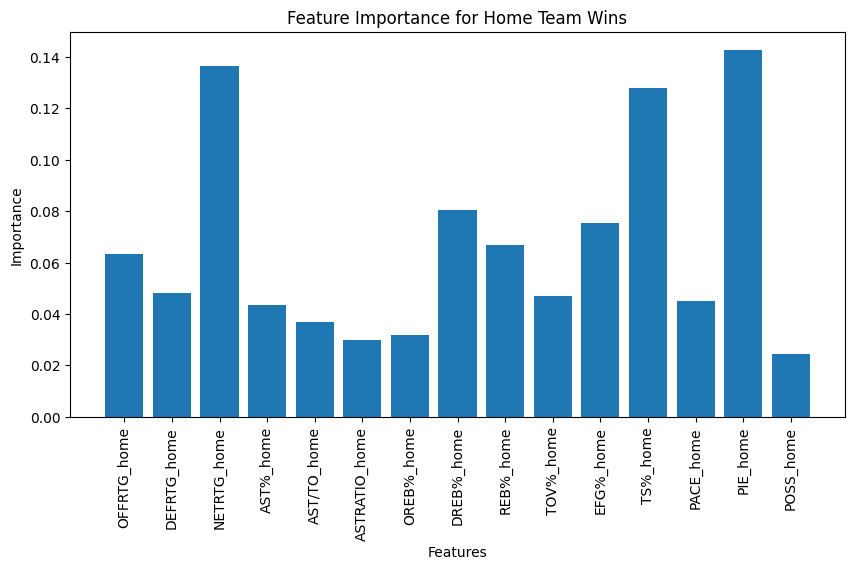

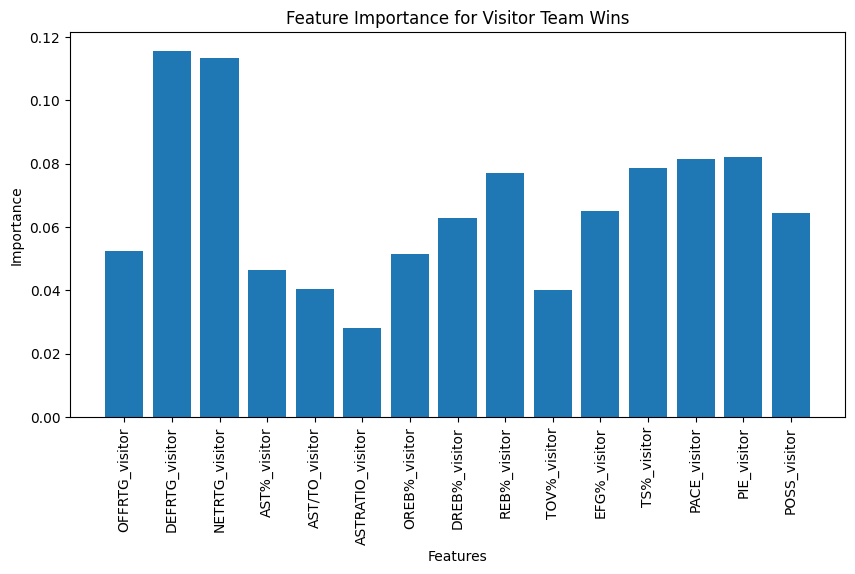

Visitor Team Wins Accuracy: 0.5933333333333334
Home Team Wins Accuracy: 0.6
Visitor Team Wins Confusion Matrix:
[[69 25]
 [36 20]]
Home Team Wins Confusion Matrix:
[[54 26]
 [34 36]]
Visitor Team Wins Classification Report:
              precision    recall  f1-score   support

       False       0.66      0.73      0.69        94
        True       0.44      0.36      0.40        56

    accuracy                           0.59       150
   macro avg       0.55      0.55      0.54       150
weighted avg       0.58      0.59      0.58       150

Home Team Wins Classification Report:
              precision    recall  f1-score   support

       False       0.61      0.68      0.64        80
        True       0.58      0.51      0.55        70

    accuracy                           0.60       150
   macro avg       0.60      0.59      0.59       150
weighted avg       0.60      0.60      0.60       150

Visitor Team Wins F1 Score: 0.39603960396039606
Home Team Wins F1 Score: 0.545454545

In [24]:

# Merging advanced stats DataFrame with all_games DataFrame
merged_df = pd.merge(all_games, adv_team_m, left_on='Visitor/Neutral', right_on='TEAM', how='left')
merged_df = pd.merge(merged_df, adv_team_m, left_on='Home/Neutral', right_on='TEAM', how='left', suffixes=('_visitor', '_home'))

# Dropping unnecessary columns
merged_df.drop(['TEAM_visitor', 'TEAM_home'], axis=1, inplace=True)


# Convert Date column to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Defining features (X) and target variables (y)
X_visitor = merged_df[['OFFRTG_visitor','DEFRTG_visitor','NETRTG_visitor','AST%_visitor','AST/TO_visitor','ASTRATIO_visitor',
                       'OREB%_visitor','DREB%_visitor','REB%_visitor','TOV%_visitor','EFG%_visitor','TS%_visitor',
                       'PACE_visitor','PIE_visitor','POSS_visitor']]  # Features for visitor team
X_home = merged_df[['OFFRTG_home','DEFRTG_home','NETRTG_home','AST%_home','AST/TO_home','ASTRATIO_home',
                    'OREB%_home','DREB%_home','REB%_home','TOV%_home','EFG%_home','TS%_home',
                    'PACE_home','PIE_home','POSS_home']]  # Features for home team
y_visitor = merged_df['Visitor_Win']
y_home = merged_df['Home_Win']

# Splitting the data into training and testing sets
X_train_visitor, X_test_visitor, y_train_visitor, y_test_visitor = train_test_split(X_visitor, y_visitor, test_size=0.2, random_state=42)
X_train_home, X_test_home, y_train_home, y_test_home = train_test_split(X_home, y_home, test_size=0.2, random_state=42)

# Training Random Forest classifiers
rf_visitor = RandomForestClassifier(n_estimators=50,bootstrap=True,criterion='gini',max_depth=None,random_state=3,oob_score=True)
rf_home = RandomForestClassifier(n_estimators=50,bootstrap=True,criterion='gini',max_depth=None,random_state=3,oob_score=True)
rf_visitor.fit(X_train_visitor, y_train_visitor)
rf_home.fit(X_train_home, y_train_home)

# Visualizing feature importances in histograms
plt.figure(figsize=(10, 5))
plt.bar(X_home.columns, rf_home.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Home Team Wins')
plt.xticks(rotation=90)
plt.show()

# Visualizing feature importances for visitor wins in histogram
plt.figure(figsize=(10, 5))
plt.bar(X_visitor.columns, rf_visitor.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Visitor Team Wins')
plt.xticks(rotation=90)
plt.show()

# Predicting the test set results
y_pred_visitor = rf_visitor.predict(X_test_visitor)
y_pred_home = rf_home.predict(X_test_home)


# Calculating the accuracy of the model
accuracy_visitor = accuracy_score(y_test_visitor, y_pred_visitor)
accuracy_home = accuracy_score(y_test_home, y_pred_home)
print('Visitor Team Wins Accuracy:', accuracy_visitor)
print('Home Team Wins Accuracy:', accuracy_home)

# Calculating the confusion matrix
cm_visitor = confusion_matrix(y_test_visitor, y_pred_visitor)
cm_home = confusion_matrix(y_test_home, y_pred_home)
print('Visitor Team Wins Confusion Matrix:')
print(cm_visitor)
print('Home Team Wins Confusion Matrix:')
print(cm_home)

# Calculating the classification report
cr_visitor = classification_report(y_test_visitor, y_pred_visitor)
cr_home = classification_report(y_test_home, y_pred_home)
print('Visitor Team Wins Classification Report:')
print(cr_visitor)
print('Home Team Wins Classification Report:')
print(cr_home)

# Calculating the F1 score
f1_visitor = f1_score(y_test_visitor, y_pred_visitor)
f1_home = f1_score(y_test_home, y_pred_home)
print('Visitor Team Wins F1 Score:', f1_visitor)
print('Home Team Wins F1 Score:', f1_home)




The results of this RF show that our model is generally prediction home wins with better precision than visiting team wins. This may be due to intangible factors like home-court advantage that ultimately favor the home team. Also, this model could be overfitted, as it is using all possible features to predict outcomes. Consequently, a new RF model was trained using only the top 4 most important features and more estimators to imporve the performance on the model, specifically on it's ability to accurately predict visitor games.

In [25]:
# Selecting top 5 features for home and visitor
X_t5_home = merged_df[['OFFRTG_home', 'EFG%_home', 'TS%_home', 'PIE_home']]
X_t5_visitor = merged_df[['DEFRTG_visitor', 'TS%_visitor', 'PACE_visitor', 'PIE_visitor']]
y_t5_home = merged_df['Home_Win']
y_t5_visitor = merged_df['Visitor_Win']

# Splitting the data into training and testing sets
X_train_home_t5, X_test_home_t5, y_train_home_t5, y_test_home_t5 = train_test_split(X_t5_home, y_t5_home, test_size=0.15, random_state=42)
X_train_visitor_t5, X_test_visitor_t5, y_train_visitor_t5, y_test_visitor_t5 = train_test_split(X_t5_visitor, y_t5_visitor, test_size=0.15, random_state=42)


# Training the models with top 5 features
rf_home_top5 = RandomForestClassifier(n_estimators=100,bootstrap=True,criterion='gini',max_depth=6, max_features='sqrt', random_state=3,oob_score=True)
rf_home_top5.fit(X_train_home_t5, y_train_home_t5)

rf_visitor_top5 = RandomForestClassifier(n_estimators=100,bootstrap=True,criterion='gini',max_depth=6, max_features='sqrt', random_state=3,oob_score=True)
rf_visitor_top5.fit(X_train_visitor_t5, y_train_visitor_t5)

y_pred_home = rf_home_top5.predict(X_test_home_t5)
y_pred_visitor = rf_visitor_top5.predict(X_test_visitor_t5)

# Calculating the accuracy of the model
accuracy_home = accuracy_score(y_test_home_t5, y_pred_home)
accuracy_visitor = accuracy_score(y_test_visitor_t5, y_pred_visitor)

print(f'Accuracy for home team wins: {accuracy_home:.2f}')
print(f'Accuracy for visitor team wins: {accuracy_visitor:.2f}')

# Calculating the confusion matrix
cm_home = confusion_matrix(y_test_home_t5, y_pred_home)
cm_visitor = confusion_matrix(y_test_visitor_t5, y_pred_visitor)
print('Confusion matrix for home team wins:')
print(cm_home)
print('Confusion matrix for visitor team wins:')
print(cm_visitor)

# Calculating the classification report
cr_home = classification_report(y_test_home_t5, y_pred_home)
cr_visitor = classification_report(y_test_visitor_t5, y_pred_visitor)
print('Classification report for home team wins:')
print(cr_home)
print('Classification report for visitor team wins:')
print(cr_visitor)

# Calculating the F1 score
f1_home = f1_score(y_test_home_t5, y_pred_home)
f1_visitor = f1_score(y_test_visitor_t5, y_pred_visitor)
print(f'F1 score for home team wins: {f1_home:.2f}')
print(f'F1 score for visitor team wins: {f1_visitor:.2f}')


Accuracy for home team wins: 0.62
Accuracy for visitor team wins: 0.64
Confusion matrix for home team wins:
[[35 26]
 [17 35]]
Confusion matrix for visitor team wins:
[[56 14]
 [27 16]]
Classification report for home team wins:
              precision    recall  f1-score   support

       False       0.67      0.57      0.62        61
        True       0.57      0.67      0.62        52

    accuracy                           0.62       113
   macro avg       0.62      0.62      0.62       113
weighted avg       0.63      0.62      0.62       113

Classification report for visitor team wins:
              precision    recall  f1-score   support

       False       0.67      0.80      0.73        70
        True       0.53      0.37      0.44        43

    accuracy                           0.64       113
   macro avg       0.60      0.59      0.59       113
weighted avg       0.62      0.64      0.62       113

F1 score for home team wins: 0.62
F1 score for visitor team wins: 0.44


Having adjusted the features on the model, to only include the top 4 most important ones, as well as changing the number of trees within the forest, our metrics for precision and accuracy have improved considerably. However, the low F1 score for true visitor wins suggests that further analysis could be done on the aforementioned intangible values such as home-court advantage.

In [26]:
# Preprocessing the AprilGames DataFrame

AprilGames = merged_df[merged_df['Date'].dt.month == 4]
AprilHome = AprilGames[['OFFRTG_home', 'EFG%_home', 'TS%_home', 'PIE_home']]
AprilAway = AprilGames[['DEFRTG_visitor', 'TS%_visitor', 'PACE_visitor', 'PIE_visitor']]

# Making predictions using the models
home_predictions = rf_home_top5.predict(AprilHome)
visitor_predictions = rf_visitor_top5.predict(AprilAway)

# Adding the predictions to the DataFrame
AprilGames['HomePredictions'] = home_predictions
AprilGames['VisitorPredictions'] = visitor_predictions

/var/folders/lj/ynlr6xyj4yv0cd8dr1r5n_9c0000gn/T/ipykernel_3236/3155967414.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/lj/ynlr6xyj4yv0cd8dr1r5n_9c0000gn/T/ipykernel_3236/3155967414.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
#creating team color dictionary for aesthetic purposes.
team_colors = {
    "Chicago Bulls": "red",
    "Cleveland Cavaliers": "maroon",
    "Boston Celtics": "green",
    "Los Angeles Clippers": "mediumblue",
    "Atlanta Hawks": "red",
    "Miami Heat": "firebrick",
    "New York Knicks": "darkorange",
    "Los Angeles Lakers": "gold",
    "Brooklyn Nets": "black",
    "Denver Nuggets": "skyblue",
    "New Orleans Pelicans": "goldenrod",
    "Detroit Pistons": "teal",
    "Portland Trail Blazers": "crimson",
    "Sacramento Kings": "purple",
    "Houston Rockets": "red",
    "San Antonio Spurs": "silver",
    "Phoenix Suns": "orange",
    "Oklahoma City Thunder": "powderblue",
    "Minnesota Timberwolves": "darkcyan",
    "Golden State Warriors": "yellow",
    "Washington Wizards": "maroon",
    "Dallas Mavericks": "lightsteelblue",
    "Memphis Grizzlies": "slategrey",
    "Indiana Pacers": "darkblue",
    "Milwaukee Bucks": "darkolivegreen",
    "Philadelphia 76ers": "mediumblue",
    "Toronto Raptors": "indianred",
    "Utah Jazz": "midnightblue",
    "Orlando Magic": "royalblue",
    "Charlotte Hornets": "teal"
}


/var/folders/lj/ynlr6xyj4yv0cd8dr1r5n_9c0000gn/T/ipykernel_3236/2151298656.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



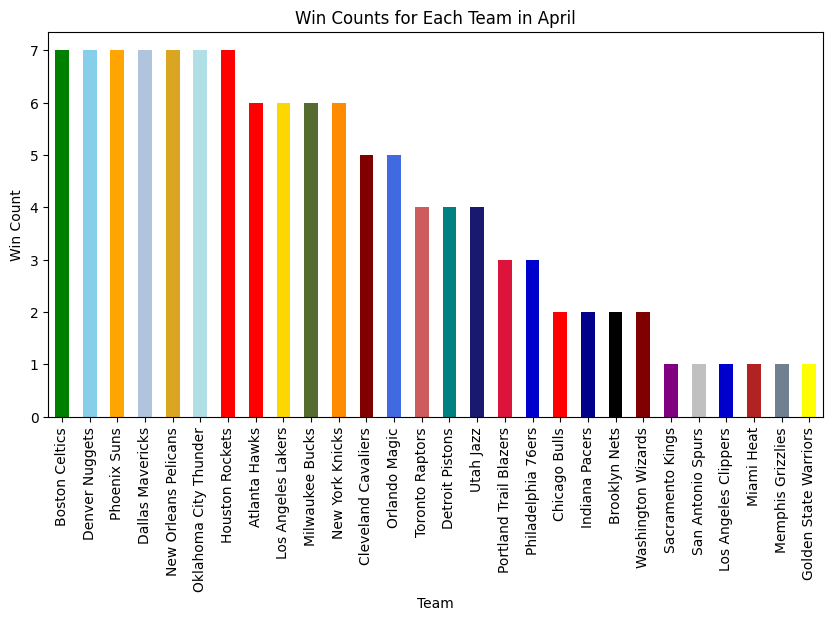

In [28]:
# Creating a new column 'Winner' in the AprilGames dataframe
AprilGames['Winner'] = np.where(AprilGames['HomePredictions'], AprilGames['Home/Neutral'], AprilGames['Visitor/Neutral'])

# Counting the number of wins for each team
win_counts = AprilGames['Winner'].value_counts()

# Creating a histogram of the win counts
colors = [team_colors[team] for team in win_counts.index]

win_counts.plot(kind='bar', figsize=(10,5), color=colors)  # Set color based on list
plt.title('Win Counts for Each Team in April')
plt.xlabel('Team')
plt.ylabel('Win Count')
plt.show()


Having carried out the predictions using our improved RF model, the winning teams are still the winning teams. Sadly our model has the Golden State Warriors only getting one win in april, and the houston rockets a whopping 7 wins - allowing the young texas team a spot in the play-in tournament while the warriors would be unable to make the playoffs and thus ending an almost decade long legacy. Other highlights from the predictions include the Dallas Mavericks having 7 wins and clinching playoffs without having to participate in the dreaded play in tournament. 

These predictions serve as a starting point for a plethora of applications, including sportsbooks most notably, however these could also be used in terms of planning ticket and merchandise sales for franchises, as well as solid city planning as the US gets ready for another season of NBA, an occurence that generated around 10.58 billion USD for the 2022-2023 season. ([statista.com](https://www.statista.com/statistics/193467/total-league-revenue-of-the-nba-since-2005/)) Further possible explorations for these models would be altering the number of maximum leaf nodes in order to improve the model's performance, or potentially investigate if there are any additional features that would improve the model's performance and accuracy such as home team win streak or injury data. 